# Lead Code Case Study


## Problem statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, we need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed me to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires me to build a model wherein I'll need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## The main steps are :
- 1.Read and understand the data

- 2.Clean the data

- 3.Prepare the data for Model Building

- 4.Model Building

- 5.Model Evaluation¶

- 6.Making Predictions on the Test Set

In [1]:
#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# read the data file by importing the file
leads = pd.read_csv("Leads.csv")

In [5]:
# reading and understanding the data
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# check the shape of the dataset
leads.shape

(9240, 37)

In [7]:
# check the statistics for numrical columns 
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#check is there any duplicates
leads.duplicated().sum()

0

In [9]:
#check the list of columns, their datatypes and null values
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## observations
- A large number of columns have null values.
- Prospect ID and Lead Number both are unique identifiers and sarves the same purpose so we drop Prospect ID column.
- Few categories have the select in their entries. Those select are essentially null values beacause it appers when lead does not select anything from dropdown so we will treat them as well

# Data Cleaning

## Rename column names
- Long column names has effect on chart so we should change the column names
- ideally, we should use Snakecase nomenclature for better column name understanding

In [10]:
# changing the nomenclature 
leads.columns = leads.columns.str.replace(' ','_').str.lower()
leads.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [11]:
# shorten column names
leads.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'want_courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

leads.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,...,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
round((leads.isnull().sum()/len(leads)),2)*100

prospect_id                      0.0
lead_number                      0.0
lead_origin                      0.0
lead_source                      0.0
do_not_email                     0.0
do_not_call                      0.0
converted                        0.0
total_visits                     1.0
time_on_website                  0.0
page_views_per_visit             1.0
last_activity                    1.0
country                         27.0
specialization                  16.0
source                          24.0
occupation                      29.0
course_selection_reason         29.0
search                           0.0
magazine                         0.0
newspaper_article                0.0
x_education_forums               0.0
newspaper                        0.0
digital_advertisement            0.0
through_recommendations          0.0
want_courses_updates             0.0
tags                            36.0
lead_quality                    52.0
supply_chain_content_updates     0.0
d

## Replace "Select" category with null values

In [13]:
# Select all non-numeric columns because select is a drop down
leads_obj = leads.select_dtypes(include='object')

# Find out colums that have "Select"
s = lambda x : x.str.contains('Select', na=False)
l = leads_obj.columns[leads_obj.apply(s).any()].tolist()
print(l)

['specialization', 'source', 'lead_profile', 'city']


 There are 4 columns that contain Select, we are going to make that change

In [14]:
# all columns which has select in it
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# replace value with nan
leads[sel_cols] = leads[sel_cols].replace('Select', np.NAN)

## Handle null values

In [15]:
# checking null values
leads.isnull().sum()

prospect_id                        0
lead_number                        0
lead_origin                        0
lead_source                       36
do_not_email                       0
do_not_call                        0
converted                          0
total_visits                     137
time_on_website                    0
page_views_per_visit             137
last_activity                    103
country                         2461
specialization                  3380
source                          7250
occupation                      2690
course_selection_reason         2709
search                             0
magazine                           0
newspaper_article                  0
x_education_forums                 0
newspaper                          0
digital_advertisement              0
through_recommendations            0
want_courses_updates               0
tags                            3353
lead_quality                    4767
supply_chain_content_updates       0
d

In [16]:
len(leads)

9240

In [17]:
# checking null values with percentage
Null_values=round((leads.isnull().sum()/len(leads)),2)*100

In [18]:
#% Summary of each columns having null values
Null_values.sort_values(ascending=False)

source                          78.0
lead_profile                    74.0
lead_quality                    52.0
asymmetrique_profile_score      46.0
asymmetrique_activity_score     46.0
asymmetrique_profile_index      46.0
asymmetrique_activity_index     46.0
city                            40.0
specialization                  37.0
tags                            36.0
course_selection_reason         29.0
occupation                      29.0
country                         27.0
last_activity                    1.0
page_views_per_visit             1.0
total_visits                     1.0
want_courses_updates             0.0
cheque_payment                   0.0
dm_content_updates               0.0
supply_chain_content_updates     0.0
mastering_interview              0.0
prospect_id                      0.0
newspaper_article                0.0
through_recommendations          0.0
digital_advertisement            0.0
newspaper                        0.0
x_education_forums               0.0
l

In [19]:
# dropping the columns with more than 40% nun values
leads.drop(columns=['source','lead_profile','lead_quality','asymmetrique_profile_score','asymmetrique_activity_score',
                            'asymmetrique_profile_index','asymmetrique_activity_index'], axis =1 , inplace=True)

In [20]:
leads.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,...,digital_advertisement,through_recommendations,want_courses_updates,tags,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified


### Column: 'City'
- This column has 40% missing value

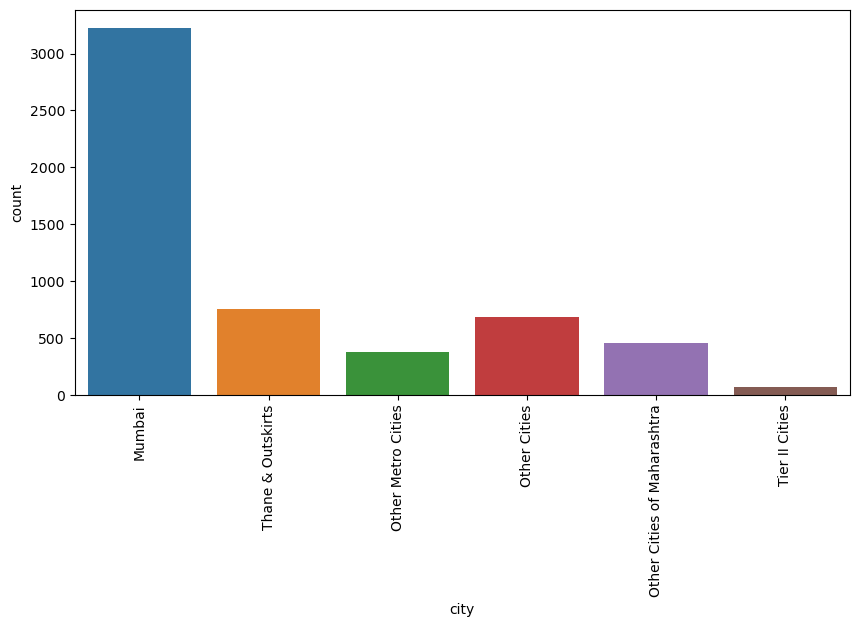

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'city', data = leads)
plt.xticks(rotation = 90)
plt.show()

In [22]:
#Finding the percentage of the diffrent categories of this column:
round(leads['city'].value_counts(normalize= True),2)*100

city
Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: proportion, dtype: float64

In [23]:
#Imputing the missing data in the 'city' column with 'Mumbai'
leads['city']= leads['city'].replace(np.nan,'Mumbai')

### Column: 'Specialization'
- This column has 37% missing values 

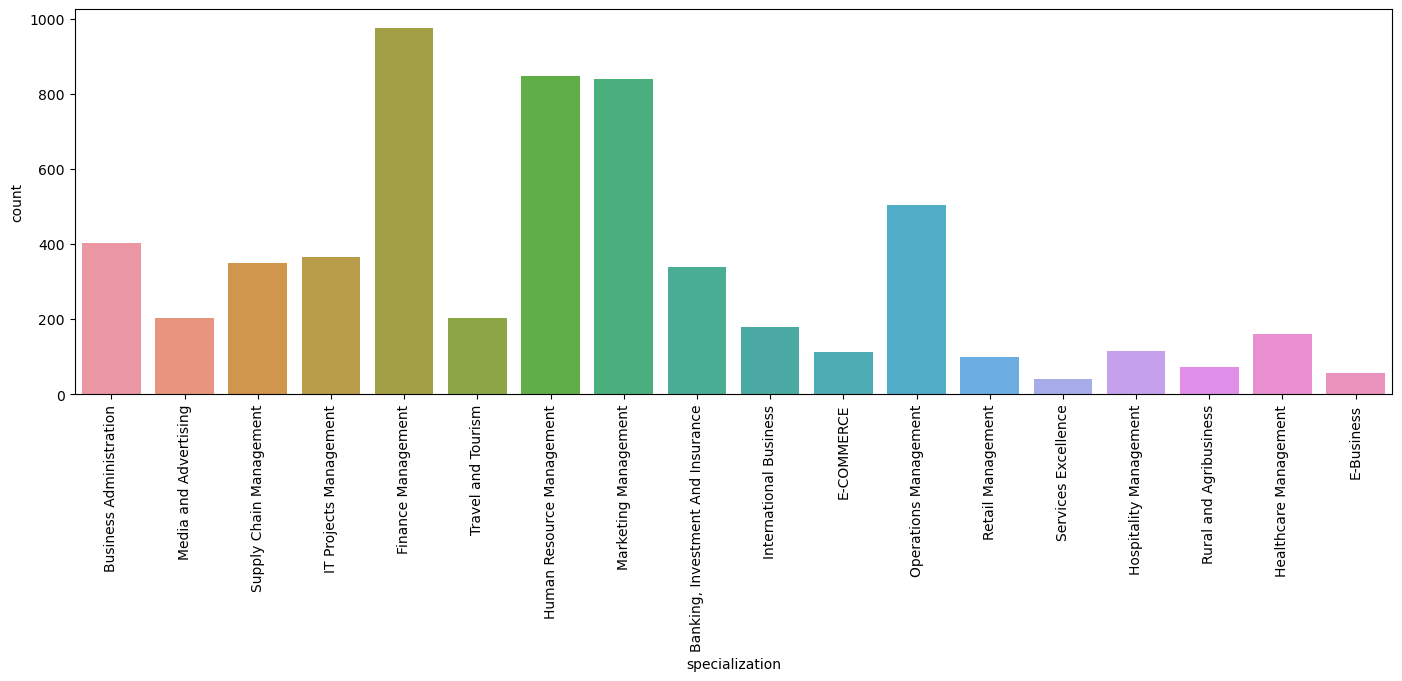

In [24]:
plt.figure(figsize=(17,5))
sns.countplot(x = 'specialization',data = leads)
plt.xticks(rotation = 90)
plt.show()

there are lot of options in this column still we have 37% missing values in this column so we can create a seprate category
for missing values which named as others. 

In [25]:
#Creating a seprate category called 'others' for missing values
leads['specialization'] = leads['specialization'].replace(np.nan,'others')

### Column: tags
- this column has 36% missing values in it

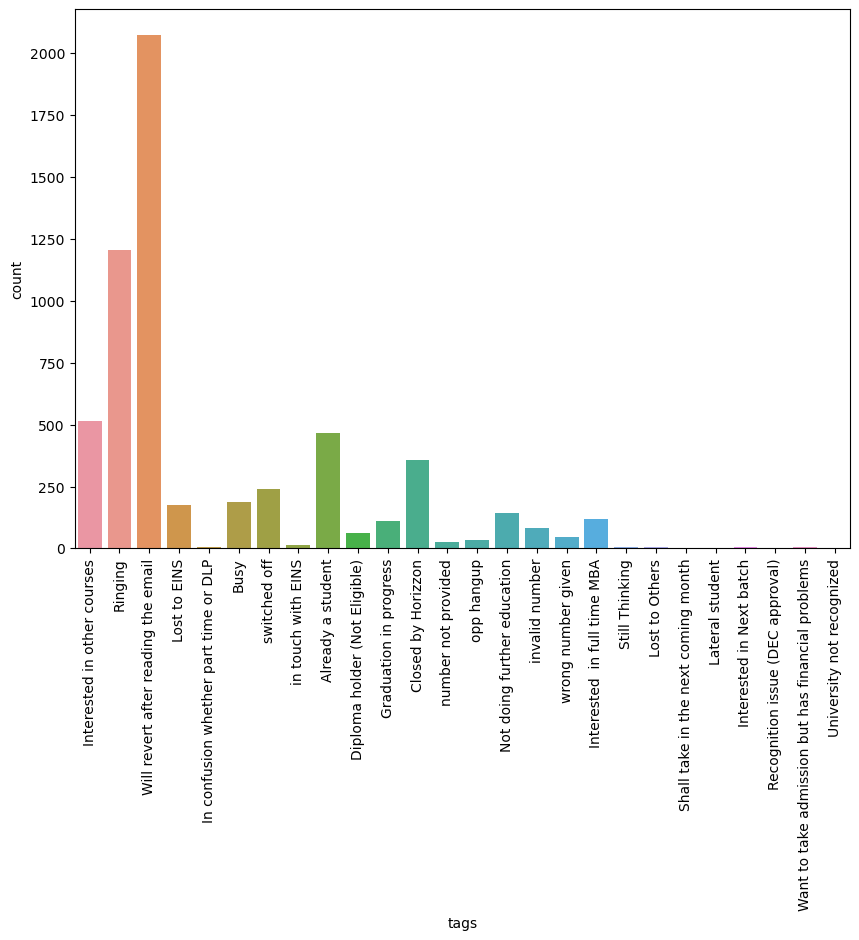

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(x= 'tags',data = leads)
plt.xticks(rotation=90)
plt.show()

Since most of the values are "will revert after reading the email", we can impute missing values in this column.

In [27]:
#imputing the missing data in the tags column with 'will revert after reading the email'
leads['tags']=leads['tags'].replace(np.nan, 'will revert after reading the email')

### Column:occupation
- this column has 29% missing values

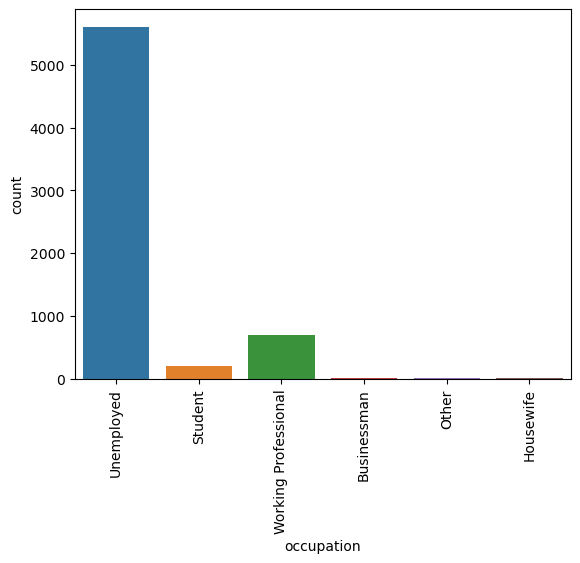

In [28]:
sns.countplot(x='occupation',data=leads)
plt.xticks(rotation = 90)
plt.show()

In [29]:
# Finding the percentage of the diffrent categories of this column:
round(leads['occupation'].value_counts(normalize=True),2)*100

occupation
Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

since the most values are 'Unemployed', we can impute missing values in this column with this value.

In [30]:
#Imputing the missing values
leads['occupation']= leads['occupation'].replace(np.nan,'Unemployed')

### Column:course_selection_reason
- this column has 29% missing values

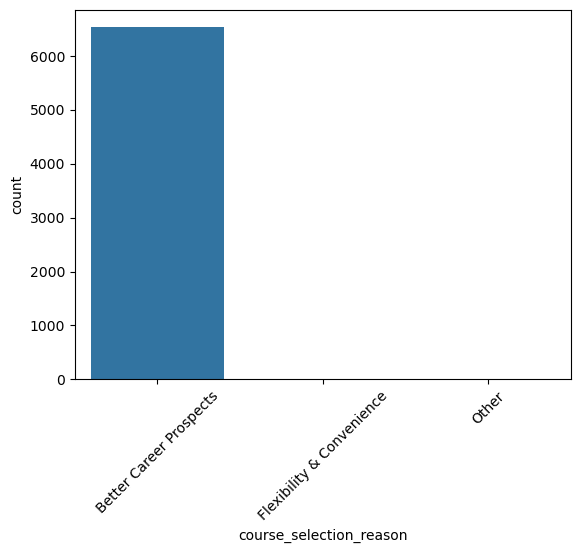

In [31]:
#Visualizing this column
sns.countplot(x='course_selection_reason', data=leads)
plt.xticks(rotation =45)
plt.show()

In [32]:
# Finding the percentage of the diffrent categories of this column
round(leads['course_selection_reason'].value_counts(normalize=True),2)*100

course_selection_reason
Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: proportion, dtype: float64

we can see that this is highly skewed column so we can remove this column.

In [33]:
#Dropping this column
leads=leads.drop('course_selection_reason',axis=1)

### Column:country
- this column has 27% missing data

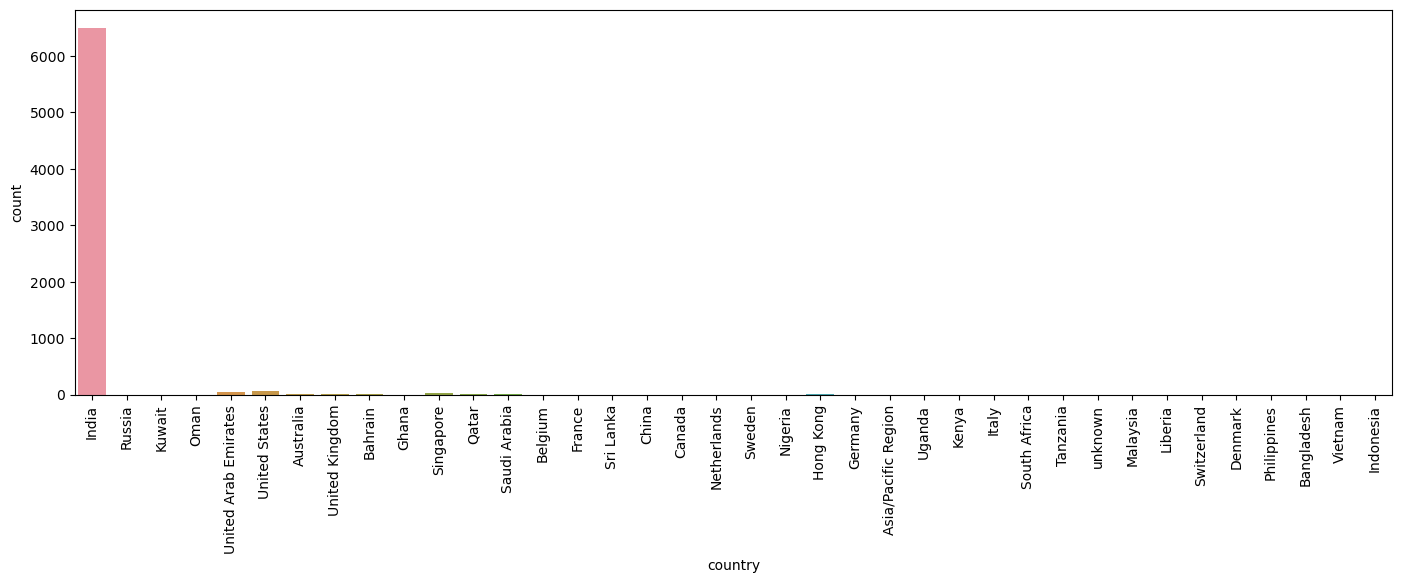

In [34]:
plt.figure(figsize=(17,5))
sns.countplot(x='country', data=leads)
plt.xticks(rotation =90)
plt.show()

Since most of the values are'india',we can impute missing values in this colum with this value.

In [35]:
#Imputing the missing data in the country column with 'India'
leads['country']= leads['country'].replace(np.nan,'India')

#### Rest missing values are under 1% so we can drop these rows.

In [36]:
#Droping the rows with null values
leads.dropna(inplace=True)

In [37]:
#checking null values again
Null_values1=round((leads.isnull().sum()/len(leads)),2)*100

In [38]:
Null_values1.sort_values(ascending=False)

prospect_id                     0.0
magazine                        0.0
mastering_interview             0.0
cheque_payment                  0.0
city                            0.0
dm_content_updates              0.0
supply_chain_content_updates    0.0
tags                            0.0
want_courses_updates            0.0
through_recommendations         0.0
digital_advertisement           0.0
newspaper                       0.0
x_education_forums              0.0
newspaper_article               0.0
search                          0.0
lead_number                     0.0
occupation                      0.0
specialization                  0.0
country                         0.0
last_activity                   0.0
page_views_per_visit            0.0
time_on_website                 0.0
total_visits                    0.0
converted                       0.0
do_not_call                     0.0
do_not_email                    0.0
lead_source                     0.0
lead_origin                 

#### now we don't have any missing values in the dataset we can start with EDA

## Exploratory Data Analysis

#### Univariate Analysis

#### 1)converted
- converted is the target variable, indicates whether a lead has been successfully converted(1) or not(0)

In [39]:
converted = (sum(leads['converted'])/len(leads['converted'].index))*100
converted

37.85541106458012

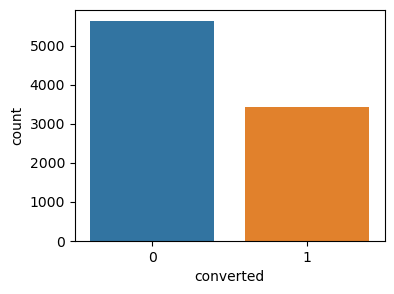

In [40]:
plt.figure(figsize=(4,3))
sns.countplot(x= "converted", data= leads)
plt.show()

The lead conversion rate is 38%

#### 2)lead_origin

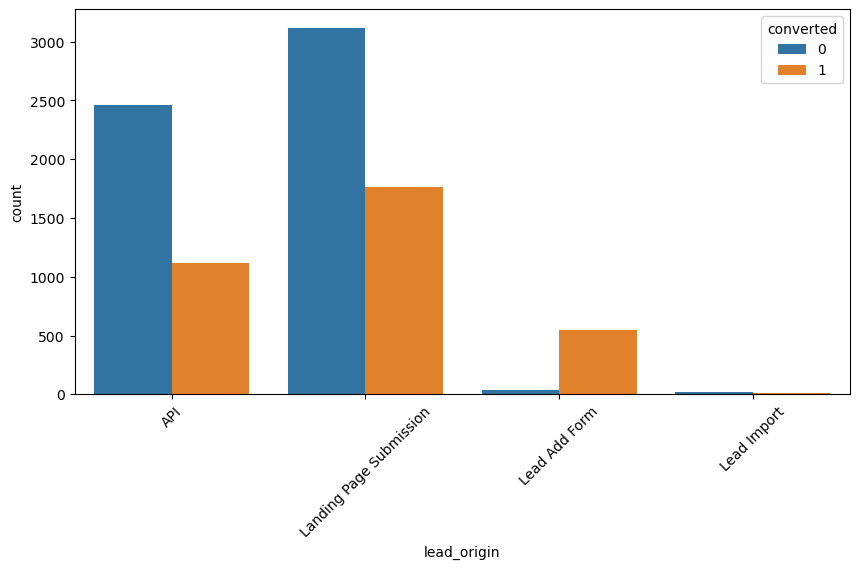

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='lead_origin',hue ='converted', data=leads)
plt.xticks(rotation = 45)
plt.show()

#### Inferance:
1. API and Landing page Submission has 30-35% conversion.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.

#### To improve overall lead conversion rate, we need to focus more on improving lead coversion of API and landing page submission origin and generate more leads from lead Add Form.

3) lead_source 

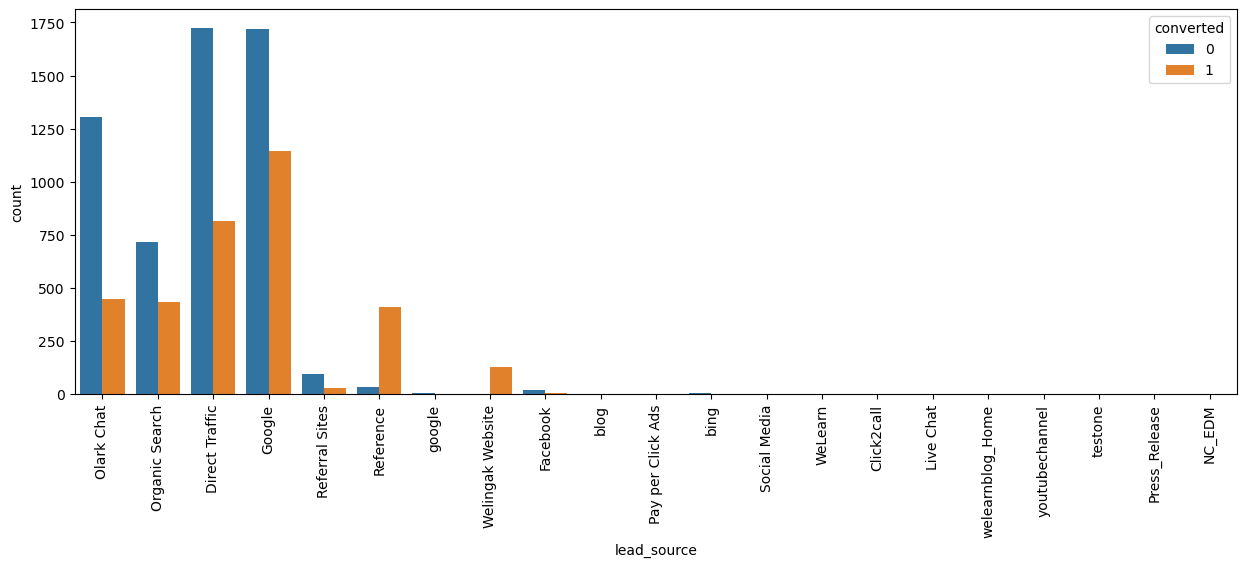

In [42]:
plt.figure(figsize=(15,5)) 
sns.countplot(x='lead_source', hue='converted', data = leads)
plt.xticks(rotation = 90)
plt.show()

In [43]:
# need to replace 'google' with 'Google' bcoz both are same
leads['lead_source']= leads['lead_source'].replace('google','Google')

In [44]:
#creating a new category 'Others' for some of the lead Sources which do not many rows
leads['lead_source']= leads['lead_source'].replace(['NC_EDM','Press_Release','testone','youtubechannel','welearnblog_Home','Live Chat',
                                                    'Click2call','WeLearn','Social Media','bing','Pay per Click Ads','blog'],'Others')

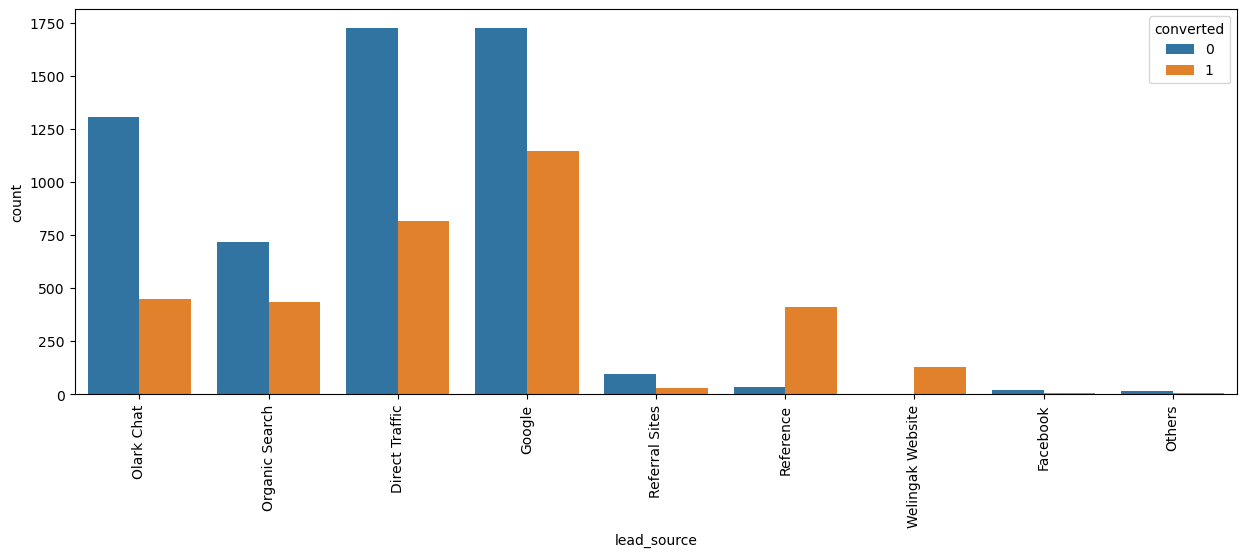

In [45]:
#visualzing again
plt.figure(figsize=(15,5)) 
sns.countplot(x='lead_source', hue='converted', data = leads)
plt.xticks(rotation = 90)
plt.show()

#### Inference
- 1.Google and Direct traffic generates maximum number of leads.
- 2.Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search,
direct traffic, and google leads and generate more leads from reference and welingak website. 

#### 4) Do not Email

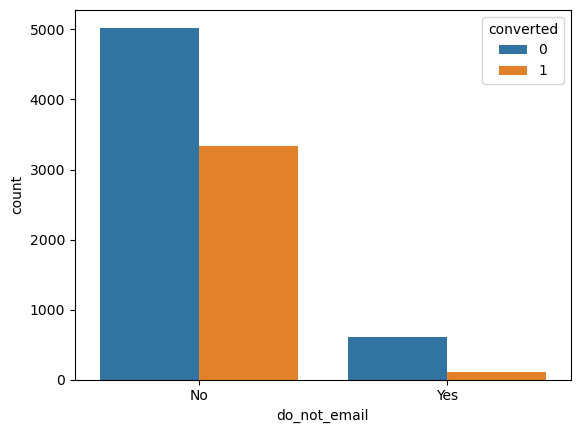

In [46]:
sns.countplot(x = 'do_not_email', hue='converted' ,data=leads)
plt.show()

#### Most of the entries are no so we cant draw any inference from this column

#### 5) do_not_call

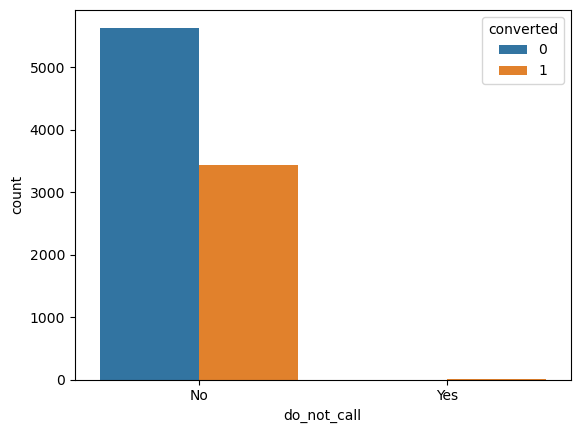

In [47]:
sns.countplot(x='do_not_call', hue='converted',data=leads)
plt.show()

#### Most of the entries are no so we cant draw any inference from this column

#### 6)total_visits

In [48]:
leads['total_visits'].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: total_visits, dtype: float64

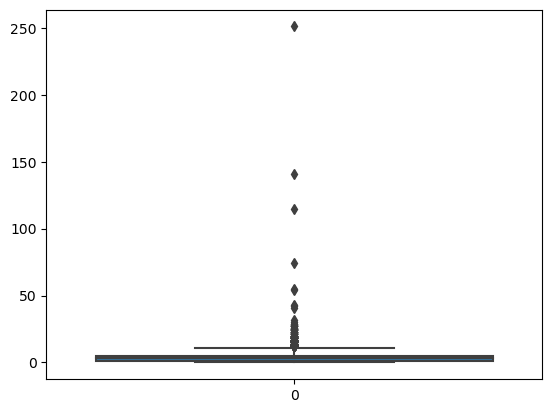

In [49]:
sns.boxplot(leads['total_visits'],orient='vert')
plt.show()

In [50]:
# As we can see there are lot of outliers in this data, we will cap outliers to 95% value for analysis

In [51]:
percetiles = leads['total_visits'].quantile([0.05,0.95]).values
leads['total_visits'][leads['total_visits'] <= percetiles[0]] = percetiles[0]
leads['total_visits'][leads['total_visits'] >= percetiles[1]] = percetiles[1]

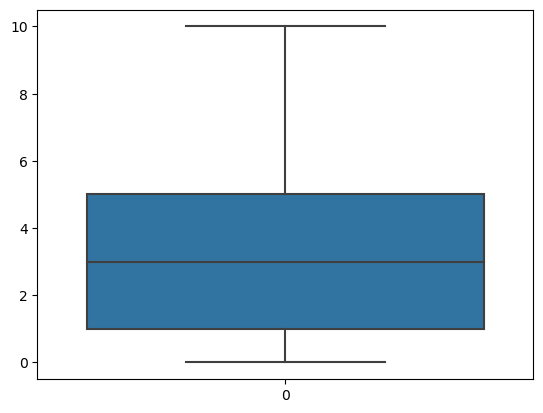

In [52]:
sns.boxplot(leads['total_visits'],orient='vert')
plt.show()

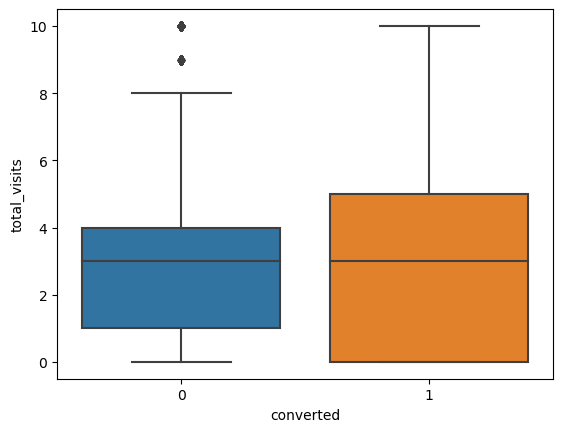

In [53]:
# as we can see there are no outliers now so we can plot this agains converted
sns.boxplot(x='converted',y='total_visits', data= leads)
plt.show()

#### Inference
- 1)Median for converted and not converted leads are the same.
- 2)Nothing can be concluded on the basis of Total Visits.

#### 7) time_on_website

In [54]:
leads['time_on_website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: time_on_website, dtype: float64

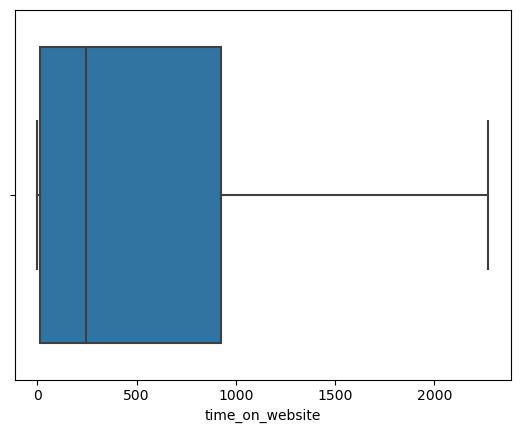

In [55]:
sns.boxplot(x='time_on_website',data=leads)
plt.show()

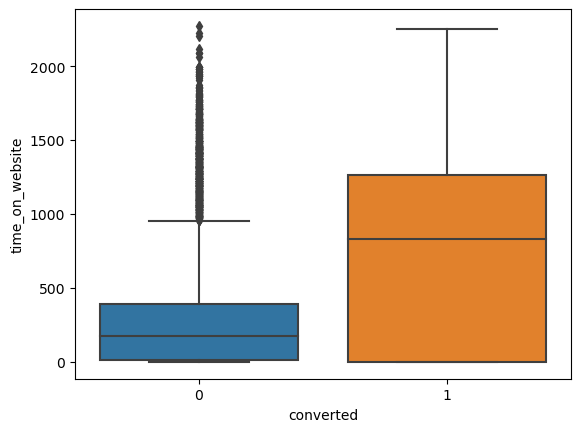

In [56]:
sns.boxplot(x='converted',y ='time_on_website', data =leads)
plt.show()

#### Inference
- Leads which are spending more time on website are more likely to be converted.

- On website content can be placed which are more engageing which will led to more time spend on website and increase conversion rate

#### 8)page_views_per_visit

In [57]:
leads['page_views_per_visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: page_views_per_visit, dtype: float64

<Axes: >

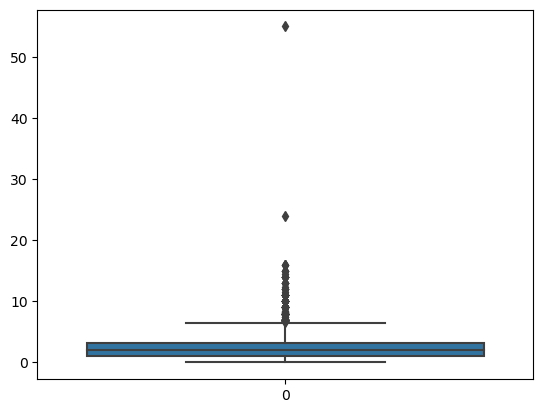

In [58]:
sns.boxplot(leads['page_views_per_visit'],orient='vert')

In [59]:
# As we can see there are many outliers in this data so we can cap outliers to 95% value for analysis.
percetiles = leads['page_views_per_visit'].quantile([0.05,0.95]).values
leads['page_views_per_visit'][leads['page_views_per_visit'] <= percetiles[0]] = percetiles[0]
leads['page_views_per_visit'][leads['page_views_per_visit'] >= percetiles[1]] = percetiles[1]

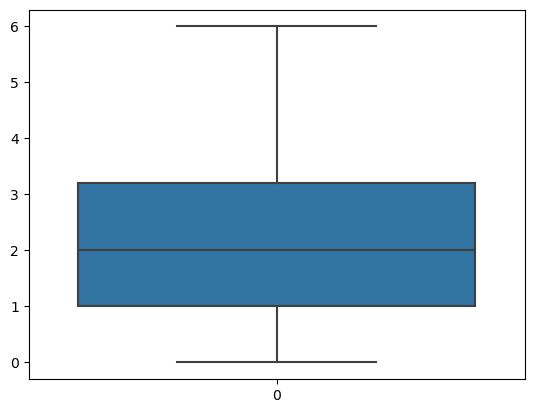

In [60]:
sns.boxplot(leads['page_views_per_visit'],orient='vert')
plt.show()

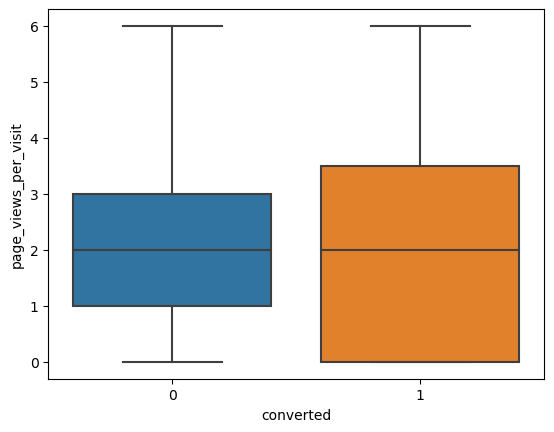

In [61]:
sns.boxplot(x='converted',y='page_views_per_visit',data=leads,orient='vert')
plt.show()

#### Inference 
- Median for both converted and non converted is the same
- Nothing can be inferned from this

#### 9)last_activity

In [62]:
leads['last_activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: last_activity, dtype: object

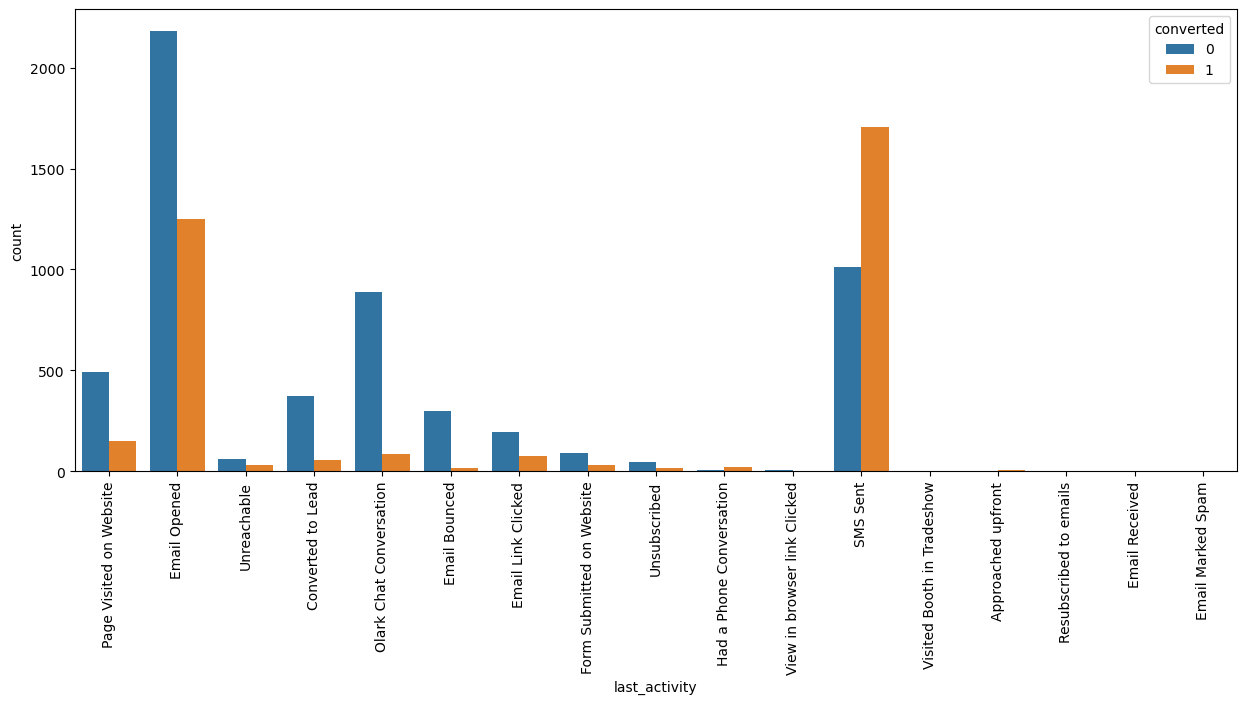

In [63]:
plt.figure(figsize=(15, 6))
sns.countplot(x='last_activity', hue='converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

In [64]:
# We can club the last activities to "Other_Activity" which are having less data.
leads['last_activity'] = leads['last_activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

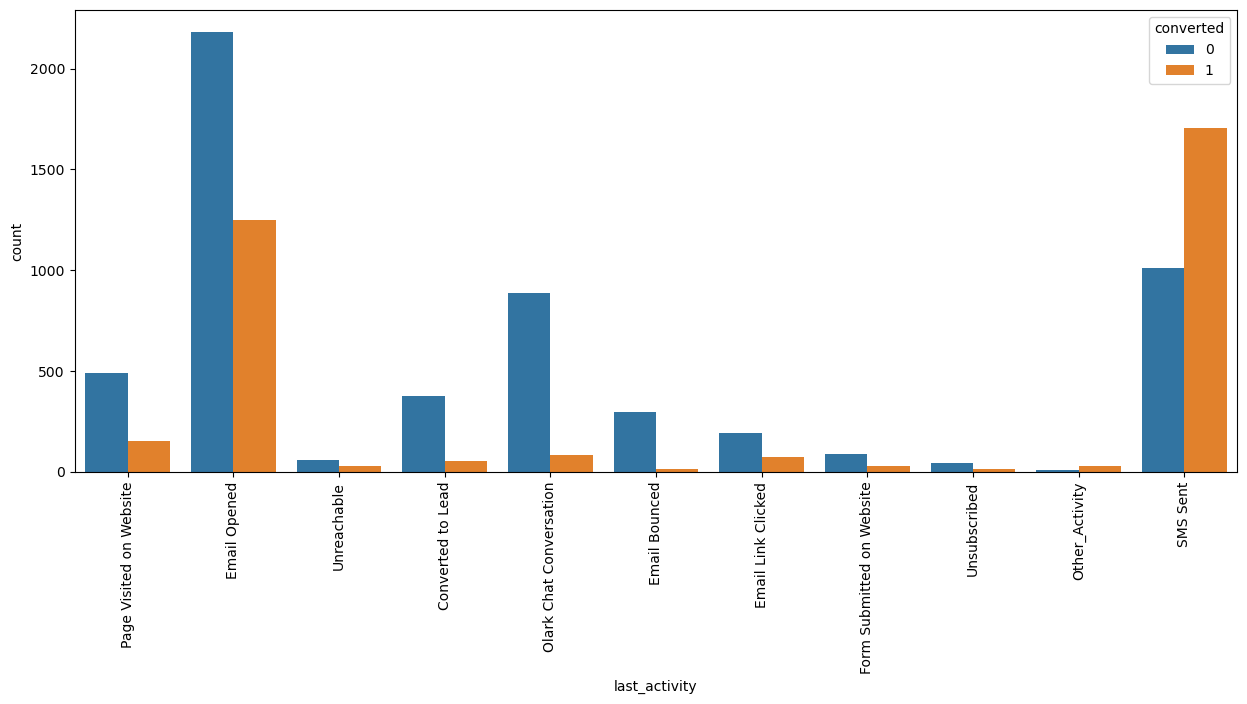

In [65]:
# visualizing again
plt.figure(figsize=(15, 6))
sns.countplot(x='last_activity', hue='converted', data=leads)
plt.xticks(rotation = 90)
plt.show()

#### Inference
- Email Opened and sms sent is the last activity of most of leads.

- Conversion rate for leads with last activity as sms sent is almost 60%

#### 10) country

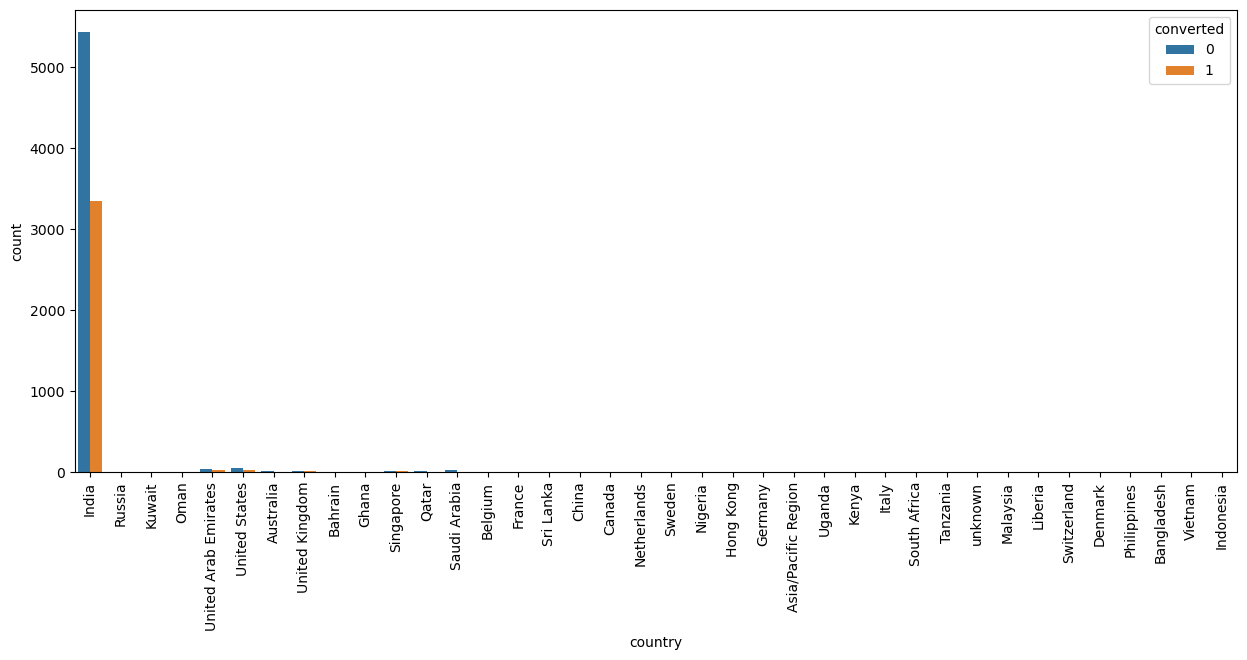

In [66]:
plt.figure(figsize=(15,6))
sns.countplot(x='country',hue='converted',data=leads)
plt.xticks(rotation =90)
plt.show()

#### Inference
- Most values are 'India' no such inference can be drawn

#### 11) specialization

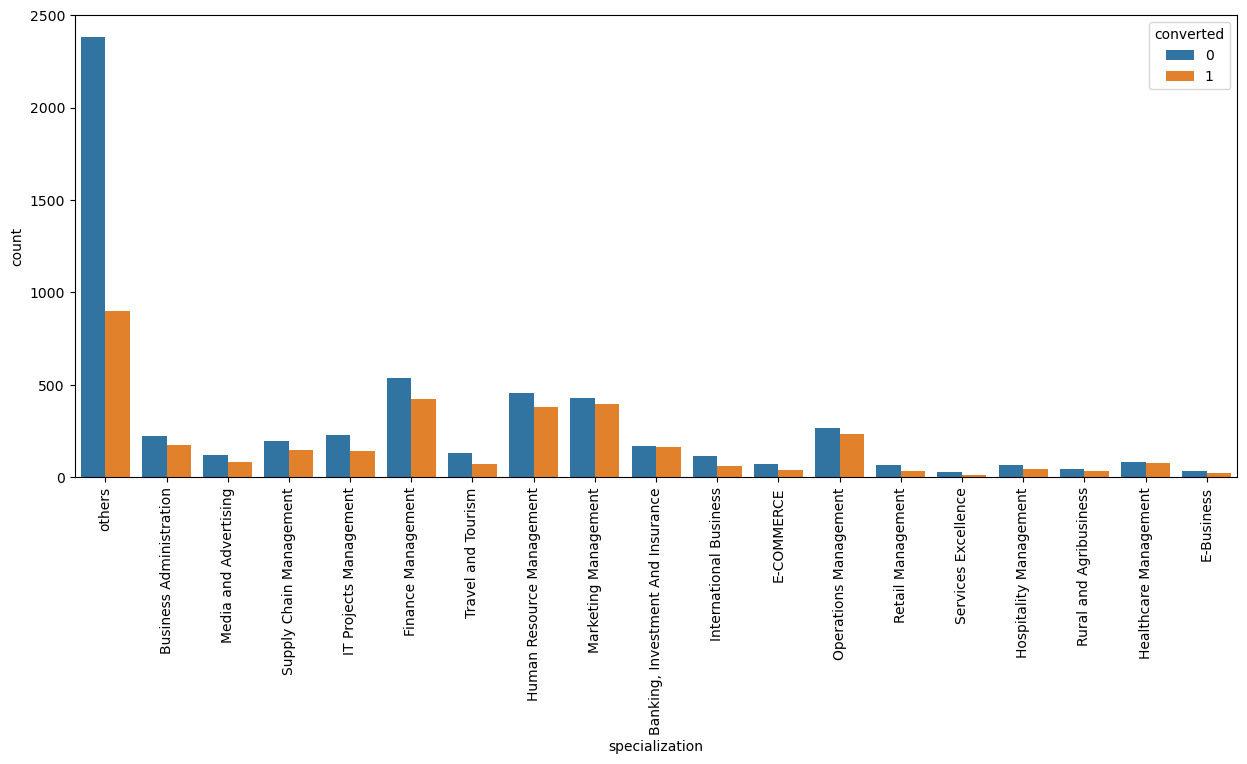

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(x='specialization',hue='converted',data=leads)
plt.xticks(rotation =90)
plt.show()

- Focus should be more on the Specialization with high conversion rate.

#### 12) occupation

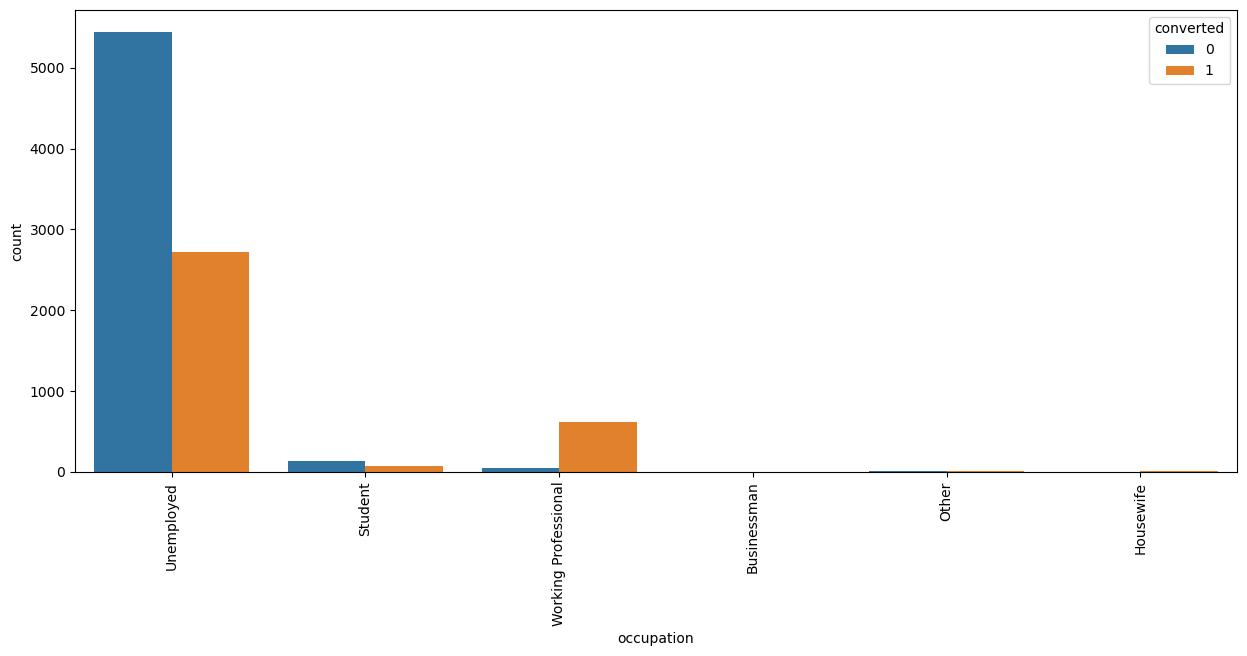

In [68]:
plt.figure(figsize=(15,6))
sns.countplot(x='occupation', hue= 'converted',data=leads)
plt.xticks(rotation =90)
plt.show()

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.

#### 13) search

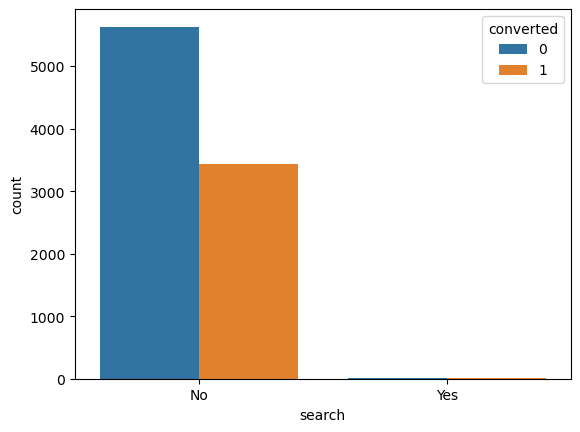

In [69]:
sns.countplot(x='search', hue='converted',data=leads)
plt.show()

- Most entries are 'No',So No Inference can be drawn with this parameter.

#### 14) magazine

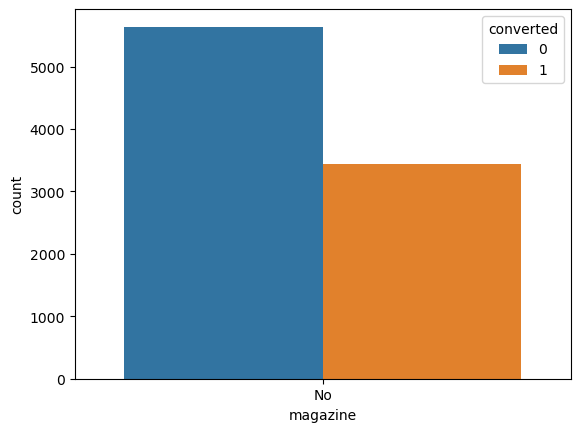

In [70]:
sns.countplot(x='magazine',hue='converted',data=leads)
plt.show()

- Most entries are 'No', So No Inference can be drawn with this parameter.

#### 15) newspaper_article

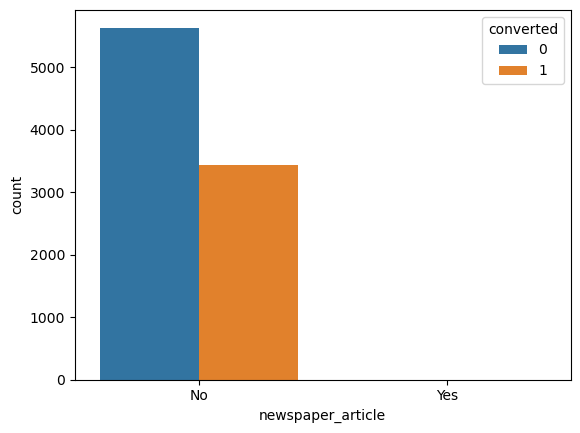

In [71]:
sns.countplot(x='newspaper_article',hue='converted',data=leads)
plt.show()

- Most entries are 'No', So No Inference can be drawn with this parameter.

#### 16) x_education_forums

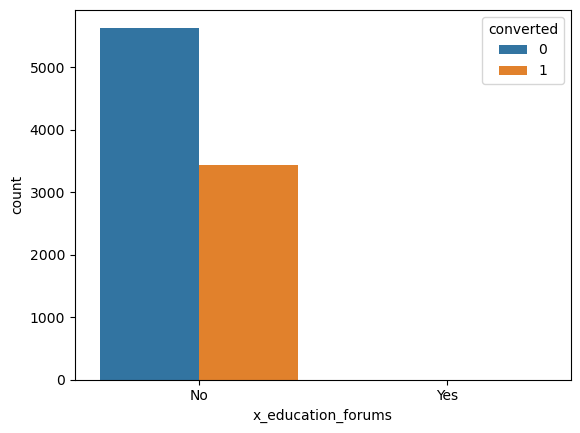

In [72]:
sns.countplot(x='x_education_forums',hue='converted',data=leads)
plt.show()

- Most entries are 'No', So No Inference can be drawn with this parameter.

#### 17) newspaper

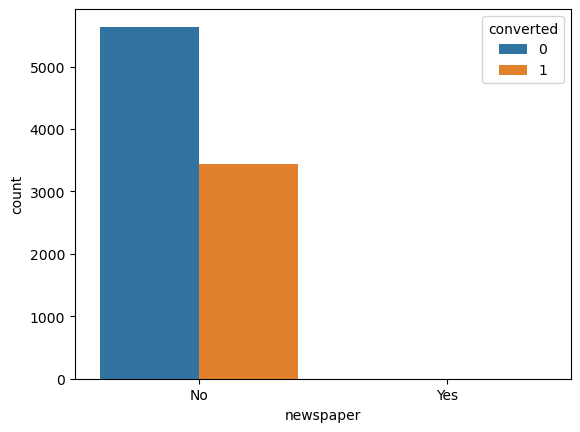

In [73]:
sns.countplot(x='newspaper',hue='converted',data=leads)
plt.show()

- Most entries are 'No', So No Inference can be drawn with this parameter.

#### 18) digital_advertisement

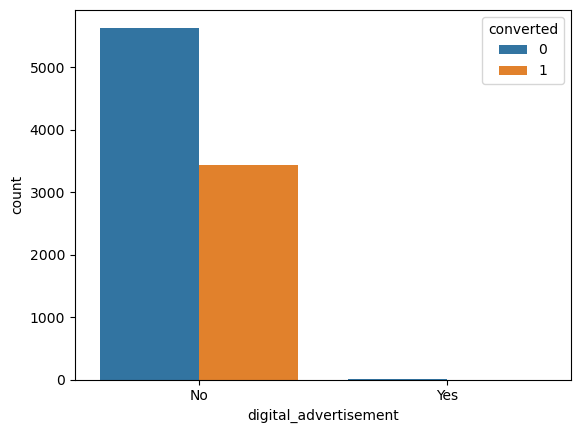

In [74]:
sns.countplot(x='digital_advertisement',hue='converted',data=leads)
plt.show()

- Most entries are 'No', So No Inference can be drawn with this parameter.

#### 19) through_recommendations

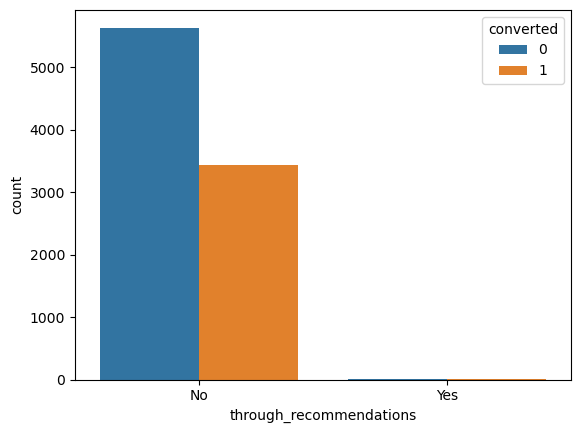

In [75]:
sns.countplot(x='through_recommendations',hue='converted',data=leads)
plt.show()

- Most entries are 'No', So No Inference can be drawn with this parameter.

#### 20) want_courses_updates

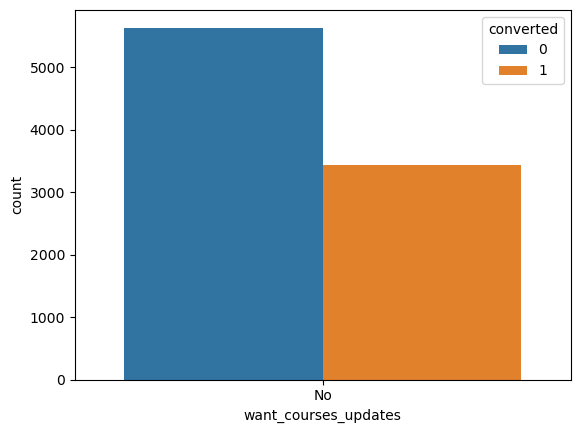

In [76]:
sns.countplot(x='want_courses_updates',hue='converted',data=leads)
plt.show()

- Most entries are 'No', So No Inference can be drawn with this parameter.

#### 21) tags

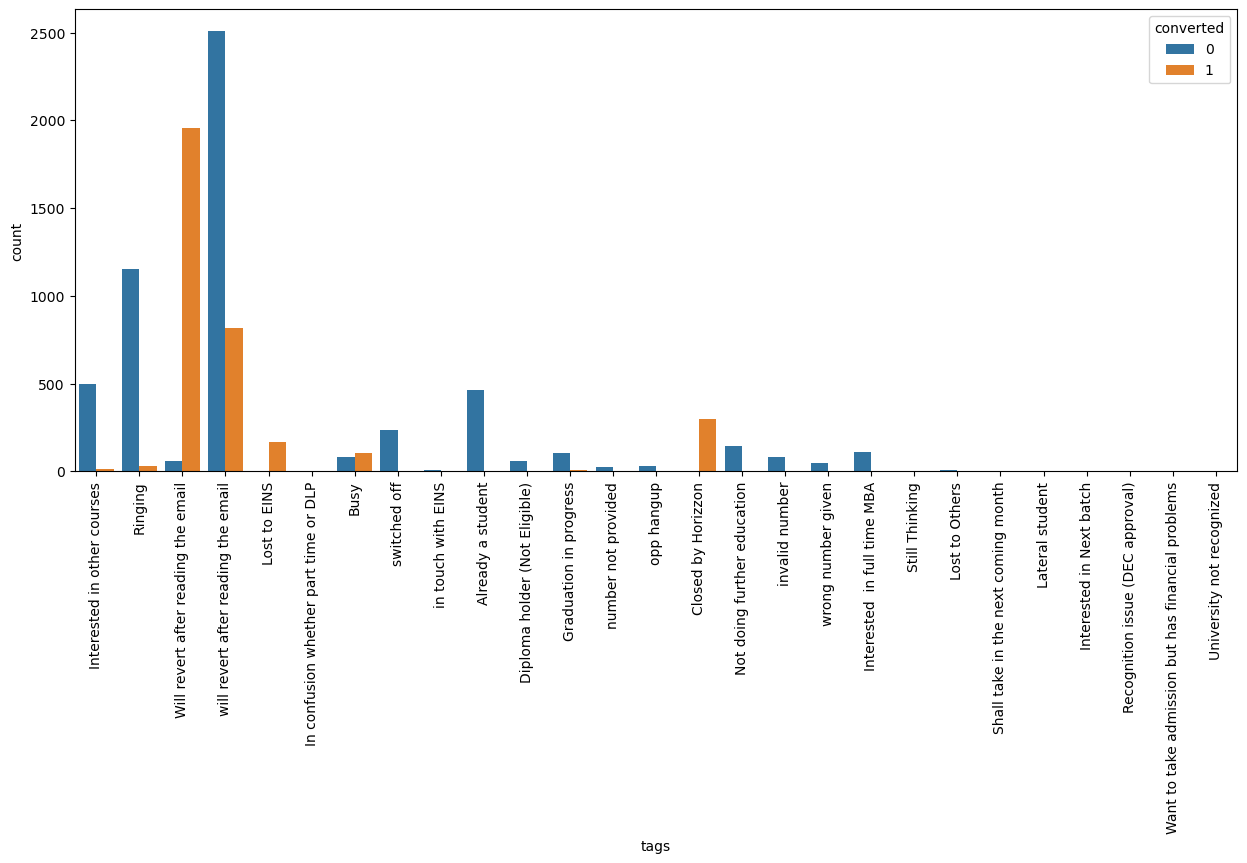

In [77]:
plt.figure(figsize=(15,6))
sns.countplot(x='tags',hue='converted',data=leads)
plt.xticks(rotation =90)
plt.show()

- Since this is a column which is generated by the sales team for their analysis ,we cant infer anything from this

#### 22) supply_chain_content_updates

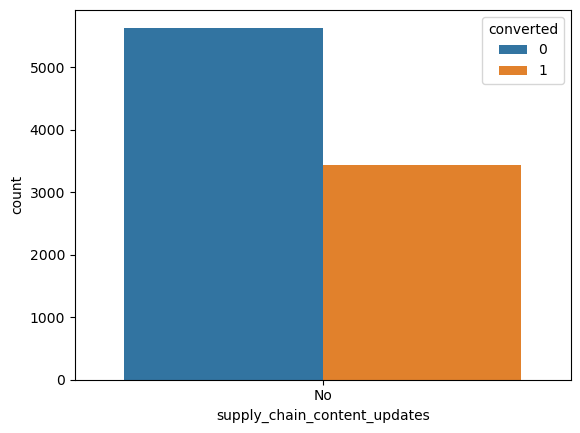

In [78]:
sns.countplot(x='supply_chain_content_updates',hue='converted',data=leads)
plt.show()

- Most entries are 'No', So No Inference can be drawn with this parameter.

#### 23) dm_content_updates

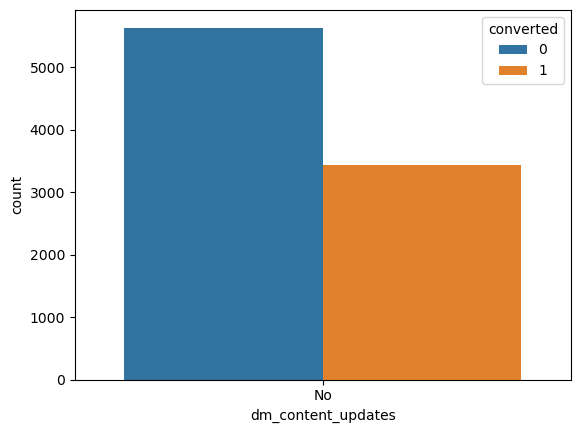

In [79]:
sns.countplot(x='dm_content_updates',hue='converted',data=leads)
plt.show()

- Most entries are 'No', So No Inference can be drawn with this parameter.

#### 24) cheque_payment

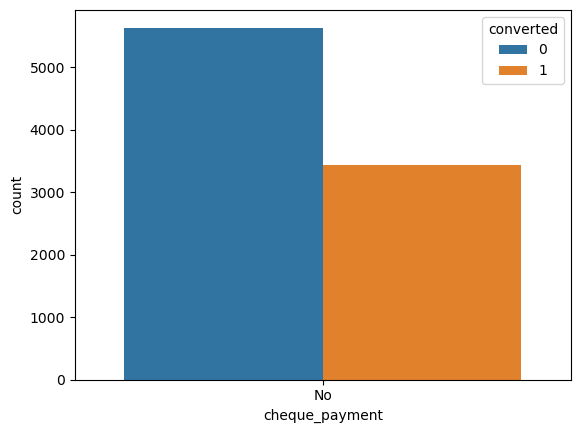

In [80]:
sns.countplot(x='cheque_payment',hue='converted',data=leads)
plt.show()

- Most entries are 'No', So No Inference can be drawn with this parameter.

#### 25) city

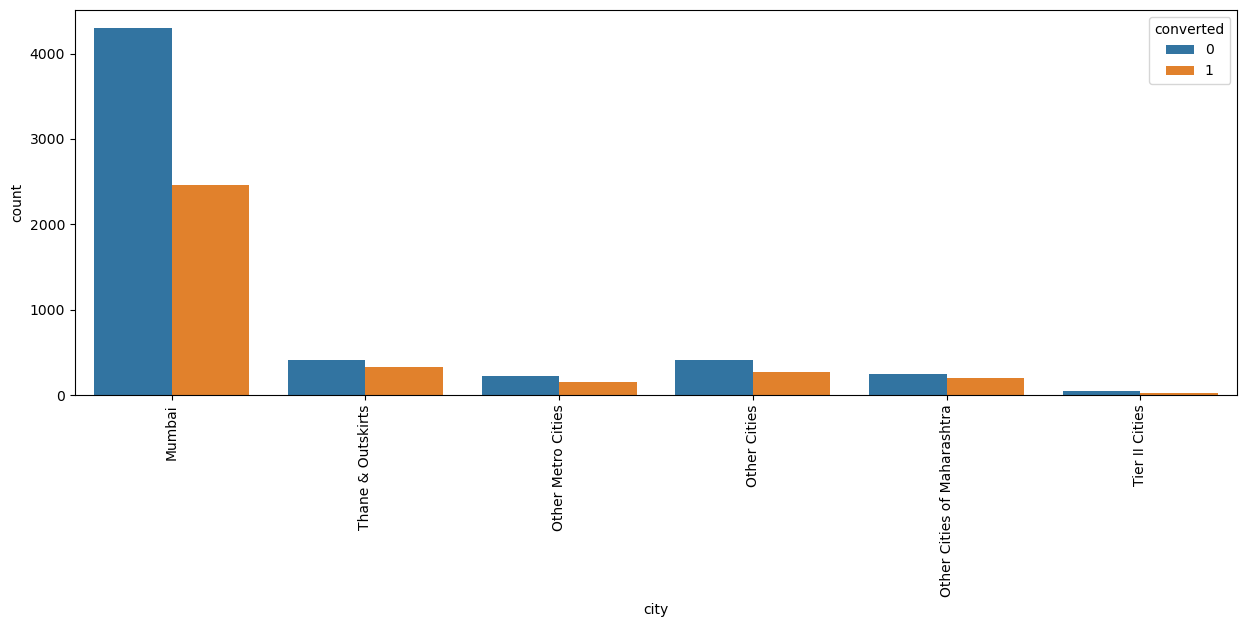

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'city', hue = 'converted', data = leads)
plt.xticks(rotation = 90)
plt.show()

- Most leads are from mumbai with 50% conversion rate

#### 26) mastering_interview

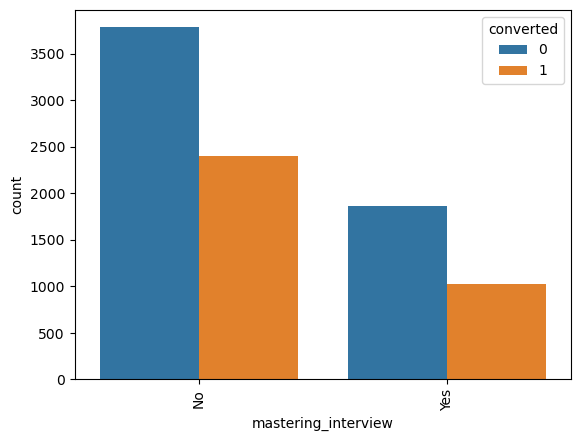

In [82]:
sns.countplot(x = 'mastering_interview', hue = 'converted', data = leads)
plt.xticks(rotation = 90)
plt.show()

- Most entries are 'No', So No Inference can be drawn with this parameter.

#### 27) last_notable_activity

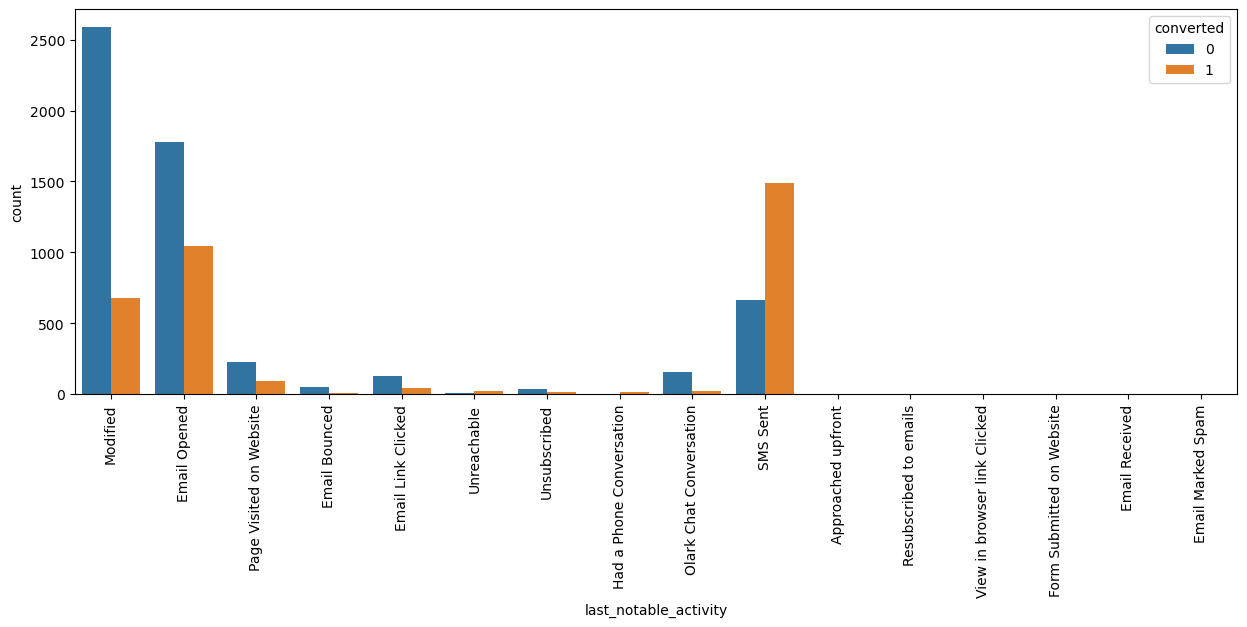

In [83]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'last_notable_activity', hue = 'converted', data = leads)
plt.xticks(rotation = 90)
plt.show()

- Since this is a column which is generated by the sales team for their analysis ,we cant infer anything from this

#### Results
#### Based on the univariate analysis we have seen many columns are not adding any information to the model, so we can drop them from future analysis

In [84]:
leads.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit', 'last_activity', 'country',
       'specialization', 'occupation', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'want_courses_updates', 'tags', 'supply_chain_content_updates',
       'dm_content_updates', 'city', 'cheque_payment', 'mastering_interview',
       'last_notable_activity'],
      dtype='object')

In [85]:
leads= leads.drop(['lead_number','tags','country','search','magazine','newspaper_article','x_education_forums', 'newspaper',
                   'digital_advertisement','through_recommendations','want_courses_updates','supply_chain_content_updates', 
                   'dm_content_updates','cheque_payment','mastering_interview'],axis=1)

In [86]:
leads.shape

(9074, 14)

In [87]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   prospect_id            9074 non-null   object 
 1   lead_origin            9074 non-null   object 
 2   lead_source            9074 non-null   object 
 3   do_not_email           9074 non-null   object 
 4   do_not_call            9074 non-null   object 
 5   converted              9074 non-null   int64  
 6   total_visits           9074 non-null   float64
 7   time_on_website        9074 non-null   int64  
 8   page_views_per_visit   9074 non-null   float64
 9   last_activity          9074 non-null   object 
 10  specialization         9074 non-null   object 
 11  occupation             9074 non-null   object 
 12  city                   9074 non-null   object 
 13  last_notable_activity  9074 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.3+ MB


## Data Preparation

1) Converting some binary variables(Yes/No) to 1/0

In [88]:
vars =['do_not_email','do_not_call']

def binary_map(x):
    return x.map({'Yes':1,'No':0})

leads[vars] = leads[vars].apply(binary_map)

In [89]:
leads.columns

Index(['prospect_id', 'lead_origin', 'lead_source', 'do_not_email',
       'do_not_call', 'converted', 'total_visits', 'time_on_website',
       'page_views_per_visit', 'last_activity', 'specialization', 'occupation',
       'city', 'last_notable_activity'],
      dtype='object')

2) Creating dummy variables for the categorical columns

In [90]:
dummy_leads = pd.get_dummies(leads[['lead_origin','lead_source','last_activity','specialization','occupation',
       'city','last_notable_activity']],drop_first=True, dtype=int)
dummy_leads.head()

,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,lead_source_Referral Sites,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
# concatenating the dummy_leads to the leads data
leads = pd.concat([leads,dummy_leads], axis =1)
leads.head()

,prospect_id,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [92]:
#Dropping the columns for which dummies are created
leads = leads.drop(['lead_origin','lead_source','last_activity','specialization','occupation',
       'city','last_notable_activity'], axis =1)
leads.head()

,prospect_id,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


3) Splitting the data into train and test set.

In [93]:
#Dropping 'prospect_id' column as it is no use
leads = leads.drop('prospect_id', axis =1 )

In [94]:
#Putting feature variable to X
X = leads.drop(['converted'], axis =1)
X.head()

,do_not_email,do_not_call,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Facebook,lead_source_Google,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [95]:
#Putting target variable to y
y = leads['converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [96]:
# Splitting the data into train and test
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.7,test_size=0.3, random_state=100)

4) scaling the features

In [97]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(X_train[['total_visits',
'time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,do_not_call,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Facebook,lead_source_Google,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [98]:
# Checking the Lead conversion rate
converted = (sum(leads['converted'])/len(leads['converted'].index))*100
converted

37.85541106458012

We have almost 38% lead conversion rate.

### Looking at the correlations

In [99]:
leads.columns

Index(['do_not_email', 'do_not_call', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_Lead Import', 'lead_source_Facebook', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_Others', 'lead_source_Reference',
       'lead_source_Referral Sites', 'lead_source_Welingak Website',
       'last_activity_Email Bounced', 'last_activity_Email Link Clicked',
       'last_activity_Email Opened', 'last_activity_Form Submitted on Website',
       'last_activity_Olark Chat Conversation', 'last_activity_Other_Activity',
       'last_activity_Page Visited on Website', 'last_activity_SMS Sent',
       'last_activity_Unreachable', 'last_activity_Unsubscribed',
       'specialization_Business Administration', 'specialization_E-Business',
       'specialization_E-COMMERCE', 'specialization_Finance Management',
       'specializ

Let's now look at the correlations 

In [100]:
corr_columns = ['do_not_email', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_Lead Import', 'lead_source_Facebook', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_Others', 'lead_source_Reference',
       'lead_source_Referral Sites', 'lead_source_Welingak Website','occupation_Housewife', 
       'occupation_Other', 'occupation_Student','occupation_Unemployed', 'occupation_Working Professional',
       'last_activity_Olark Chat Conversation']

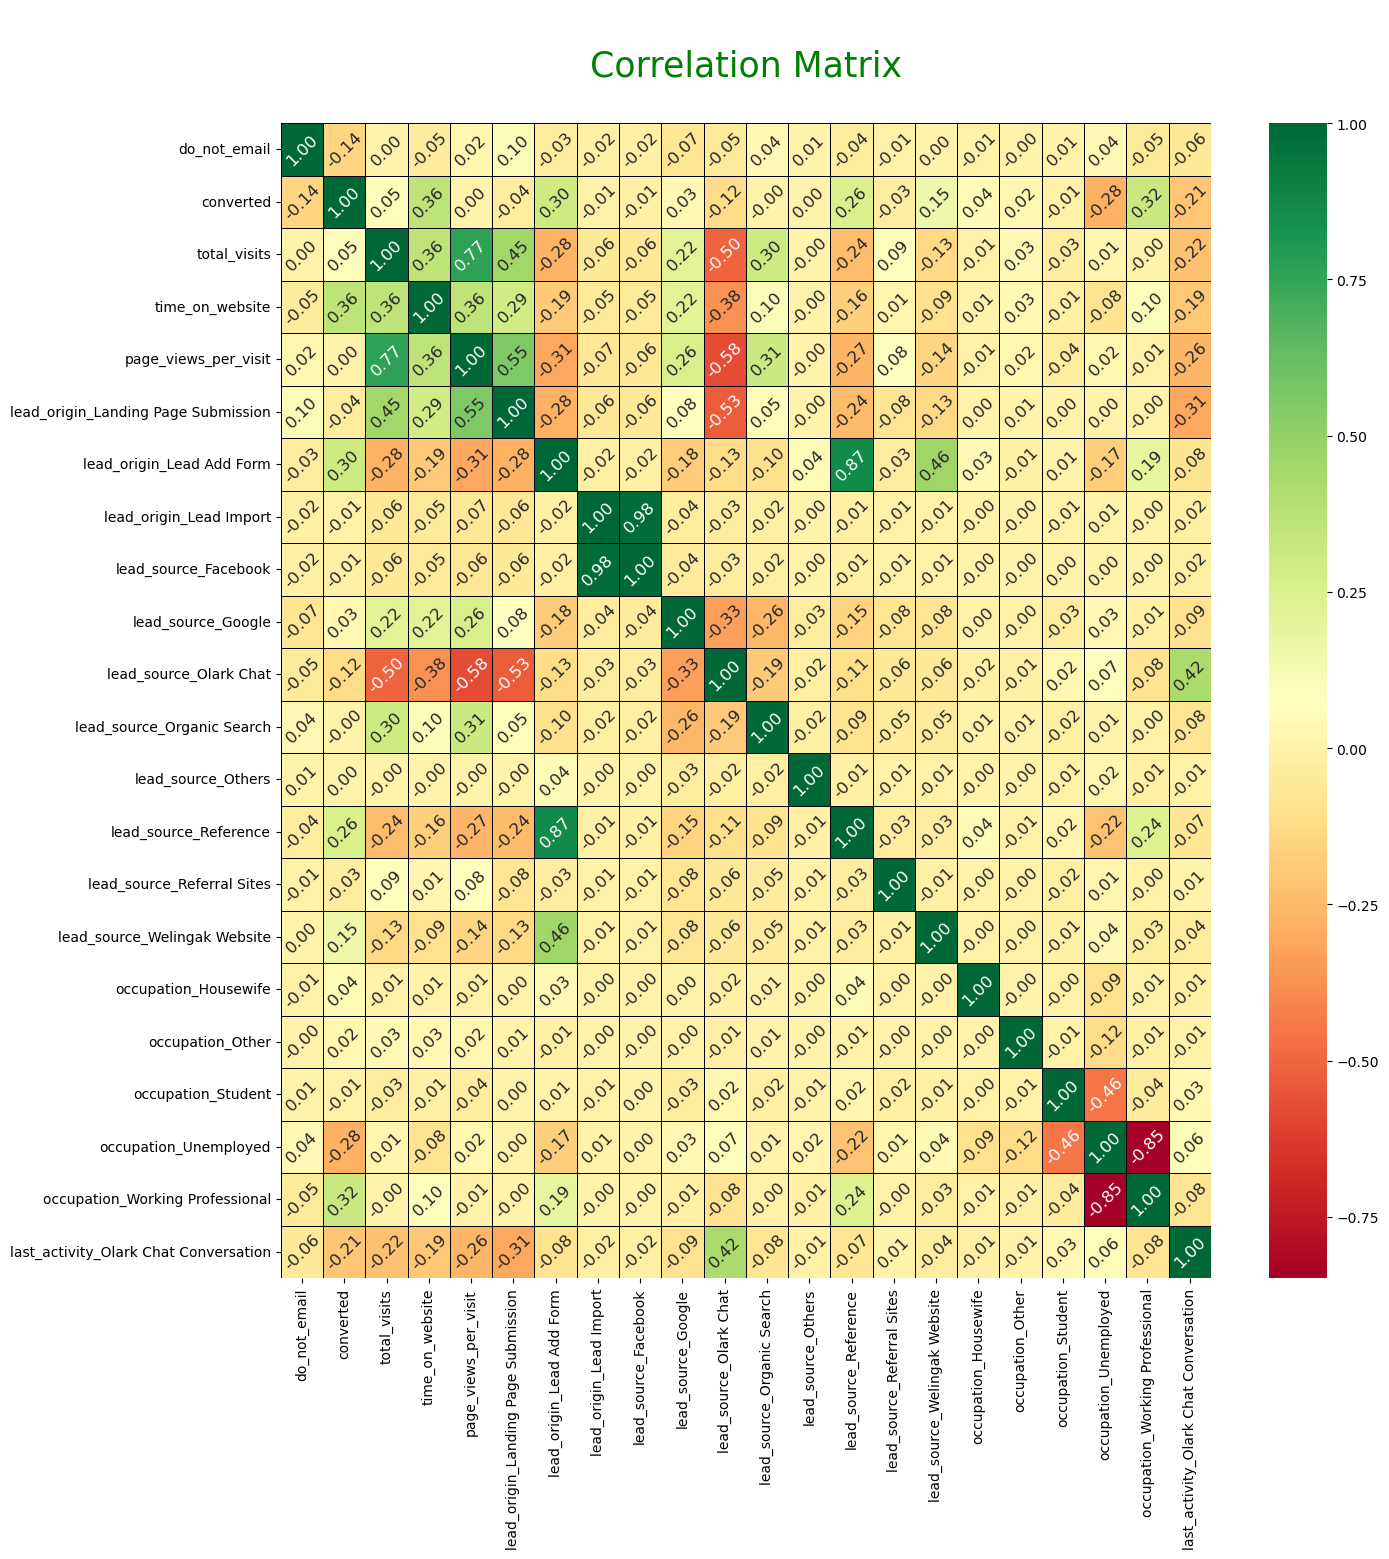

In [101]:
fig = plt.figure(figsize=(15,15))
ax = sns.heatmap(leads[corr_columns].corr(), cmap="RdYlGn", annot=True, 
                 annot_kws = {'size':12, 'rotation': 45, 'fontweight': 40}, 
                linewidth = 0.5, linecolor ='black', fmt='.2f')
plt.title("\nCorrelation Matrix\n", fontsize = 25, fontweight = 20, color = 'green')
plt.show()

From the above Correlation Matrix, it's clear that 'lead_source_Facebook' & 'lead_origin_Lead Import' ,'lead_origin_Lead Add Form' & 'lead_source_Reference' have good correlation.

#### Feature Selection using RFE

In [102]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)  #running RFE with 20 variables as o/p
rfe = rfe.fit(X_train ,y_train)


In [103]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False])

In [104]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('do_not_call', False, 9),
 ('total_visits', False, 21),
 ('time_on_website', True, 1),
 ('page_views_per_visit', False, 20),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', True, 1),
 ('lead_source_Facebook', False, 24),
 ('lead_source_Google', False, 25),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', False, 36),
 ('lead_source_Others', False, 28),
 ('lead_source_Reference', True, 1),
 ('lead_source_Referral Sites', False, 48),
 ('lead_source_Welingak Website', True, 1),
 ('last_activity_Email Bounced', False, 19),
 ('last_activity_Email Link Clicked', False, 13),
 ('last_activity_Email Opened', False, 7),
 ('last_activity_Form Submitted on Website', False, 35),
 ('last_activity_Olark Chat Conversation', True, 1),
 ('last_activity_Other_Activity', True, 1),
 ('last_activity_Page Visited on Website', False, 12),
 ('last_activity_SMS Sent', True, 1),
 ('last_acti

In [105]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['do_not_email', 'time_on_website',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_Lead Import', 'lead_source_Olark Chat',
       'lead_source_Reference', 'lead_source_Welingak Website',
       'last_activity_Olark Chat Conversation', 'last_activity_Other_Activity',
       'last_activity_SMS Sent', 'last_activity_Unsubscribed',
       'specialization_others', 'occupation_Housewife', 'occupation_Student',
       'occupation_Unemployed', 'occupation_Working Professional',
       'last_notable_activity_Had a Phone Conversation',
       'last_notable_activity_Modified', 'last_notable_activity_Unreachable'],
      dtype='object')

In [106]:
len(cols) 

20

## Model Building

Model 1

In [107]:
X_train_sm = sm.add_constant(X_train[cols])

In [108]:
logm1 = sm.GLM(y_train,X_train_sm ,family = sm.families.Binomial())
result= logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Tue, 23 Jul 2024   Deviance:                       5180.6
Time:                        12:26:24   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.8338      0.637      1.309      0.190      -0.414       2.082
do_not_email                                      -1.6759      0.191     -8.796      0.000      -2.049      -1.302
time_on_website                                    1.1081      0.041     27.194      0.000       1.028       1.188
lead_origin_Landing Page Submission               -1.1219      0.130     -8.663      0.000      -1.376      -0.868
lead_origin_Lead Add Form                          1.6019      0.915      1.751      0.080      -0.191       3.395
lead_origin_Lead Import                            0.9059      0.480      1.888      0.059      -0.035       1.846
lead_source_Olark Chat                             1.1250      0.124      9.082      0.000       0.882       1.368
lead_source_Reference                              1.7697      0.938      1.887      0.059      -0.069       3.608
lead_source_Welingak Website                       4.2961      1.165      3.687      0.000       2.012       6.580
last_activity_Olark Chat Conversation             -0.9504      0.172     -5.531      0.000      -1.287      -0.614
last_activity_Other_Activity                       1.8717      0.537      3.483      0.000       0.818       2.925
last_activity_SMS Sent                             1.3454      0.076     17.766      0.000       1.197       1.494
last_activity_Unsubscribed                         1.4083      0.483      2.917      0.004       0.462       2.355
specialization_others                             -1.1410      0.126     -9.052      0.000      -1.388      -0.894
occupation_Housewife                              21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
occupation_Student                                -0.5518      0.673     -0.820      0.412      -1.871       0.767
occupation_Unemployed                             -1.0059      0.634     -1.587      0.113      -2.248       0.236
occupation_Working Professional                    1.6281      0.660      2.466      0.014       0.334       2.922
last_notable_activity_Had a Phone Conversation     1.4204      1.223      1.161      0.246      -0.978       3.818
last_notable_activity_Modified                    -0.8675      0.082    -10.620      0.000      -1.028      -0.707
last_notable_activity_Unreachable                  1.5785      0.476      3.316      0.001       0.645       2.512
==================================================================================================================
"""

since the Pvalue of the 'occupation_Housewife' is very high so we can drop this column

In [109]:
#Dropping the column 'occupation_Housewife'
col1 = cols.drop('occupation_Housewife')

Model 2

In [110]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm ,family = sm.families.Binomial())
result= logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Tue, 23 Jul 2024   Deviance:                       5184.5
Time:                        12:26:24   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.3160      0.590      2.230      0.026       0.159       2.473
do_not_email                                      -1.6800      0.191     -8.812      0.000      -2.054      -1.306
time_on_website                                    1.1069      0.041     27.184      0.000       1.027       1.187
lead_origin_Landing Page Submission               -1.1154      0.129     -8.621      0.000      -1.369      -0.862
lead_origin_Lead Add Form                          1.6044      0.915      1.754      0.079      -0.189       3.397
lead_origin_Lead Import                            0.9081      0.480      1.893      0.058      -0.032       1.848
lead_source_Olark Chat                             1.1254      0.124      9.085      0.000       0.883       1.368
lead_source_Reference                              1.7729      0.938      1.890      0.059      -0.066       3.611
lead_source_Welingak Website                       4.2952      1.165      3.685      0.000       2.011       6.579
last_activity_Olark Chat Conversation             -0.9512      0.172     -5.531      0.000      -1.288      -0.614
last_activity_Other_Activity                       1.8733      0.537      3.486      0.000       0.820       2.927
last_activity_SMS Sent                             1.3445      0.076     17.756      0.000       1.196       1.493
last_activity_Unsubscribed                         1.4117      0.483      2.924      0.003       0.466       2.358
specialization_others                             -1.1373      0.126     -9.031      0.000      -1.384      -0.890
occupation_Student                                -1.0384      0.627     -1.656      0.098      -2.268       0.191
occupation_Unemployed                             -1.4919      0.585     -2.550      0.011      -2.638      -0.345
occupation_Working Professional                    1.1419      0.613      1.862      0.063      -0.060       2.344
last_notable_activity_Had a Phone Conversation     1.4165      1.223      1.158      0.247      -0.981       3.814
last_notable_activity_Modified                    -0.8703      0.082    -10.657      0.000      -1.030      -0.710
last_notable_activity_Unreachable                  1.5745      0.476      3.305      0.001       0.641       2.508
==================================================================================================================
"""

Since Pvalue of 'last_notable_activity_Had a Phone Conversation' is very high, so we can drop this column.

In [111]:
col2 = col1.drop('last_notable_activity_Had a Phone Conversation')

Model 3

In [112]:
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm ,family = sm.families.Binomial())
result= logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Tue, 23 Jul 2024   Deviance:                       5186.1
Time:                        12:26:24   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.3199      0.590      2.235      0.025       0.163       2.477
do_not_email                             -1.6826      0.191     -8.816      0.000      -2.057      -1.308
time_on_website                           1.1059      0.041     27.170      0.000       1.026       1.186
lead_origin_Landing Page Submission      -1.1158      0.129     -8.626      0.000      -1.369      -0.862
lead_origin_Lead Add Form                 1.6034      0.915      1.753      0.080      -0.190       3.396
lead_origin_Lead Import                   0.9065      0.480      1.890      0.059      -0.034       1.847
lead_source_Olark Chat                    1.1230      0.124      9.064      0.000       0.880       1.366
lead_source_Reference                     1.7724      0.938      1.889      0.059      -0.066       3.611
lead_source_Welingak Website              4.2977      1.165      3.688      0.000       2.013       6.582
last_activity_Olark Chat Conversation    -0.9462      0.172     -5.503      0.000      -1.283      -0.609
last_activity_Other_Activity              2.2308      0.463      4.820      0.000       1.324       3.138
last_activity_SMS Sent                    1.3440      0.076     17.751      0.000       1.196       1.492
last_activity_Unsubscribed                1.4134      0.483      2.928      0.003       0.467       2.360
specialization_others                    -1.1413      0.126     -9.063      0.000      -1.388      -0.895
occupation_Student                       -1.0390      0.627     -1.656      0.098      -2.269       0.191
occupation_Unemployed                    -1.4916      0.585     -2.549      0.011      -2.639      -0.345
occupation_Working Professional           1.1383      0.614      1.855      0.064      -0.064       2.341
last_notable_activity_Modified           -0.8767      0.082    -10.750      0.000      -1.037      -0.717
last_notable_activity_Unreachable         1.5719      0.476      3.299      0.001       0.638       2.506
=========================================================================================================
"""

Checking for VIF values:

In [113]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,lead_origin_Lead Add Form,62.65
6,lead_source_Reference,48.09
7,lead_source_Welingak Website,15.51
14,occupation_Unemployed,12.37
2,lead_origin_Landing Page Submission,7.24
12,specialization_others,4.63
5,lead_source_Olark Chat,2.32
16,last_notable_activity_Modified,1.87
15,occupation_Working Professional,1.81
10,last_activity_SMS Sent,1.64


as we can see 'occupation_Student' column has high Pvalue so we can delete this column

In [114]:
col2= col2.drop('occupation_Student')

Model 4

In [115]:
X_train_sm = sm.add_constant(X_train[col2])
logm4 = sm.GLM(y_train,X_train_sm ,family = sm.families.Binomial())
result= logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Tue, 23 Jul 2024   Deviance:                       5189.0
Time:                        12:26:25   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.4409      0.240      1.836      0.066      -0.030       0.912
do_not_email                             -1.6789      0.191     -8.807      0.000      -2.053      -1.305
time_on_website                           1.1067      0.041     27.196      0.000       1.027       1.186
lead_origin_Landing Page Submission      -1.1290      0.129     -8.745      0.000      -1.382      -0.876
lead_origin_Lead Add Form                 1.5974      0.914      1.747      0.081      -0.195       3.390
lead_origin_Lead Import                   0.8993      0.480      1.874      0.061      -0.041       1.840
lead_source_Olark Chat                    1.1178      0.124      9.029      0.000       0.875       1.360
lead_source_Reference                     1.7790      0.938      1.897      0.058      -0.059       3.617
lead_source_Welingak Website              4.3023      1.165      3.693      0.000       2.019       6.586
last_activity_Olark Chat Conversation    -0.9478      0.172     -5.518      0.000      -1.284      -0.611
last_activity_Other_Activity              2.2295      0.463      4.816      0.000       1.322       3.137
last_activity_SMS Sent                    1.3427      0.076     17.728      0.000       1.194       1.491
last_activity_Unsubscribed                1.4093      0.483      2.919      0.004       0.463       2.356
specialization_others                    -1.1534      0.126     -9.171      0.000      -1.400      -0.907
occupation_Unemployed                    -0.6003      0.213     -2.818      0.005      -1.018      -0.183
occupation_Working Professional           2.0282      0.283      7.161      0.000       1.473       2.583
last_notable_activity_Modified           -0.8740      0.081    -10.725      0.000      -1.034      -0.714
last_notable_activity_Unreachable         1.5774      0.475      3.318      0.001       0.646       2.509
=========================================================================================================
"""

Checking for VIF values:

In [116]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,lead_origin_Lead Add Form,62.59
6,lead_source_Reference,48.08
7,lead_source_Welingak Website,15.51
13,occupation_Unemployed,9.76
2,lead_origin_Landing Page Submission,5.76
12,specialization_others,4.00
5,lead_source_Olark Chat,2.24
15,last_notable_activity_Modified,1.86
14,occupation_Working Professional,1.66
10,last_activity_SMS Sent,1.63


as we can see 'lead_origin_Lead Add Form' has high Pvalue so we can drop this column.

In [117]:
col2 = col2.drop('lead_origin_Lead Add Form')

Model 5

In [118]:
X_train_sm = sm.add_constant(X_train[col2])
logm5 = sm.GLM(y_train,X_train_sm ,family = sm.families.Binomial())
result= logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Tue, 23 Jul 2024   Deviance:                       5192.3
Time:                        12:26:25   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.4578      0.240      1.907      0.056      -0.013       0.928
do_not_email                             -1.6806      0.191     -8.816      0.000      -2.054      -1.307
time_on_website                           1.1047      0.041     27.190      0.000       1.025       1.184
lead_origin_Landing Page Submission      -1.1473      0.129     -8.907      0.000      -1.400      -0.895
lead_origin_Lead Import                   0.8826      0.480      1.838      0.066      -0.059       1.824
lead_source_Olark Chat                    1.1108      0.124      8.993      0.000       0.869       1.353
lead_source_Reference                     3.3614      0.243     13.840      0.000       2.885       3.837
lead_source_Welingak Website              5.8902      0.730      8.073      0.000       4.460       7.320
last_activity_Olark Chat Conversation    -0.9522      0.172     -5.544      0.000      -1.289      -0.616
last_activity_Other_Activity              2.2254      0.463      4.808      0.000       1.318       3.133
last_activity_SMS Sent                    1.3427      0.076     17.732      0.000       1.194       1.491
last_activity_Unsubscribed                1.4077      0.483      2.916      0.004       0.462       2.354
specialization_others                    -1.1652      0.126     -9.273      0.000      -1.411      -0.919
occupation_Unemployed                    -0.5974      0.213     -2.804      0.005      -1.015      -0.180
occupation_Working Professional           2.0280      0.283      7.158      0.000       1.473       2.583
last_notable_activity_Modified           -0.8745      0.081    -10.736      0.000      -1.034      -0.715
last_notable_activity_Unreachable         1.5728      0.475      3.308      0.001       0.641       2.505
=========================================================================================================
"""

Checking for VIF values:

In [119]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,occupation_Unemployed,9.72
2,lead_origin_Landing Page Submission,5.74
11,specialization_others,3.99
4,lead_source_Olark Chat,2.24
14,last_notable_activity_Modified,1.86
13,occupation_Working Professional,1.66
9,last_activity_SMS Sent,1.63
7,last_activity_Olark Chat Conversation,1.59
5,lead_source_Reference,1.46
1,time_on_website,1.32


In [120]:
#Dropping the column 'occupation_Unemployed' beacause it has high VIF
col2 = col2.drop('occupation_Unemployed')

Model 6

In [121]:
X_train_sm = sm.add_constant(X_train[col2])
logm6 = sm.GLM(y_train,X_train_sm ,family = sm.families.Binomial())
result= logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Tue, 23 Jul 2024   Deviance:                       5200.0
Time:                        12:26:25   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.1106      0.127     -0.868      0.385      -0.361       0.139
do_not_email                             -1.6767      0.191     -8.786      0.000      -2.051      -1.303
time_on_website                           1.1047      0.041     27.207      0.000       1.025       1.184
lead_origin_Landing Page Submission      -1.1519      0.129     -8.935      0.000      -1.405      -0.899
lead_origin_Lead Import                   0.8640      0.480      1.799      0.072      -0.077       1.805
lead_source_Olark Chat                    1.1164      0.124      9.037      0.000       0.874       1.359
lead_source_Reference                     3.3731      0.243     13.906      0.000       2.898       3.848
lead_source_Welingak Website              5.8819      0.730      8.063      0.000       4.452       7.312
last_activity_Olark Chat Conversation    -0.9437      0.172     -5.502      0.000      -1.280      -0.608
last_activity_Other_Activity              2.2075      0.463      4.767      0.000       1.300       3.115
last_activity_SMS Sent                    1.3276      0.075     17.609      0.000       1.180       1.475
last_activity_Unsubscribed                1.3822      0.483      2.863      0.004       0.436       2.328
specialization_others                    -1.1774      0.126     -9.356      0.000      -1.424      -0.931
occupation_Working Professional           2.6063      0.195     13.382      0.000       2.225       2.988
last_notable_activity_Modified           -0.8814      0.081    -10.826      0.000      -1.041      -0.722
last_notable_activity_Unreachable         1.5571      0.474      3.284      0.001       0.628       2.486
=========================================================================================================
"""

Checking for VIF values:

In [122]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,specialization_others,2.17
4,lead_source_Olark Chat,2.04
13,last_notable_activity_Modified,1.79
2,lead_origin_Landing Page Submission,1.70
7,last_activity_Olark Chat Conversation,1.59
9,last_activity_SMS Sent,1.57
1,time_on_website,1.30
5,lead_source_Reference,1.24
0,do_not_email,1.21
12,occupation_Working Professional,1.19


In [123]:
#Dropping column 'lead_origin_Lead Import' beacause it has high Pvalue
col2 = col2.drop('lead_origin_Lead Import')

Model 7

In [124]:
X_train_sm = sm.add_constant(X_train[col2])
logm7 = sm.GLM(y_train,X_train_sm ,family = sm.families.Binomial())
result= logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 23 Jul 2024   Deviance:                       5203.0
Time:                        12:26:25   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0717      0.126     -0.570      0.569      -0.318       0.175
do_not_email                             -1.6783      0.191     -8.798      0.000      -2.052      -1.304
time_on_website                           1.0976      0.040     27.211      0.000       1.019       1.177
lead_origin_Landing Page Submission      -1.1863      0.128     -9.291      0.000      -1.437      -0.936
lead_source_Olark Chat                    1.0915      0.123      8.905      0.000       0.851       1.332
lead_source_Reference                     3.3401      0.242     13.812      0.000       2.866       3.814
lead_source_Welingak Website              5.8588      0.729      8.033      0.000       4.429       7.288
last_activity_Olark Chat Conversation    -0.9485      0.171     -5.531      0.000      -1.285      -0.612
last_activity_Other_Activity              2.1988      0.463      4.752      0.000       1.292       3.106
last_activity_SMS Sent                    1.3250      0.075     17.587      0.000       1.177       1.473
last_activity_Unsubscribed                1.3784      0.482      2.858      0.004       0.433       2.324
specialization_others                    -1.1983      0.126     -9.536      0.000      -1.445      -0.952
occupation_Working Professional           2.6064      0.195     13.389      0.000       2.225       2.988
last_notable_activity_Modified           -0.8816      0.081    -10.833      0.000      -1.041      -0.722
last_notable_activity_Unreachable         1.5470      0.474      3.264      0.001       0.618       2.476
=========================================================================================================
"""

Checking for VIF values:

In [125]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,specialization_others,2.17
3,lead_source_Olark Chat,2.03
12,last_notable_activity_Modified,1.79
2,lead_origin_Landing Page Submission,1.70
6,last_activity_Olark Chat Conversation,1.59
8,last_activity_SMS Sent,1.57
1,time_on_website,1.29
4,lead_source_Reference,1.24
0,do_not_email,1.21
11,occupation_Working Professional,1.19


In [126]:
X_train_sm.columns

Index(['const', 'do_not_email', 'time_on_website',
       'lead_origin_Landing Page Submission', 'lead_source_Olark Chat',
       'lead_source_Reference', 'lead_source_Welingak Website',
       'last_activity_Olark Chat Conversation', 'last_activity_Other_Activity',
       'last_activity_SMS Sent', 'last_activity_Unsubscribed',
       'specialization_others', 'occupation_Working Professional',
       'last_notable_activity_Modified', 'last_notable_activity_Unreachable'],
      dtype='object')

Since the Pvalues of all variables is less than 0.05 and VIF values are low for all the variables, model-7 is our final model. We have 14 variables in our final model.

#### Making Prediction on the Train set

In [127]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred

3009    0.192492
1012    0.107074
9226    0.329484
4750    0.866550
7987    0.802188
          ...   
367     0.182758
82      0.934056
8199    0.918319
7077    0.212649
5754    0.289108
Length: 6351, dtype: float64

In [128]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.19249248, 0.10707422, 0.32948401, ..., 0.91831908, 0.21264862,
       0.28910751])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [129]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.192492,3009
1,0,0.107074,1012
2,0,0.329484,9226
3,1,0.866550,4750
4,1,0.802188,7987


- Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
- Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [130]:
y_train_pred_final['predicted'] =y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.192492,3009,0
1,0,0.107074,1012,0
2,0,0.329484,9226,0
3,1,0.866550,4750,1
4,1,0.802188,7987,1


#### Making a Confusion matrix

In [131]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3459  446]
 [ 710 1736]]


In [132]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3459      446
# converted            710       1736  

In [133]:
# overall accuracy
print('Accuracy :', metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

Accuracy : 0.8179814202487797


Metrics beyond simple accuracy

In [134]:
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positive
FN = confusion[1,0] # false negatives

In [135]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
specificity = TN/(TN + FP)   
PPV = TP /(TP + FP) # positive predictive value
NPV = TN /(TN + FN) # negative predictive value
sensitivity = TP/(TP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
TPR = TP/(TP + FN) # true positive rate
TNR = TN/(TN + FP) # true negative rate
FPR = FP/(TN + FP) # false positive rate
FNR = FN/(TP + FN) # false negative rate
    
print ("True Negatives                        : ", TN)
print ("False Positves                        : ", FP)
print ("False Negatives                       : ", FN)
print ("True Positives                        : ", TP)
    
print ("Model Accuracy value is               : ", round(accuracy*100,2),"%")
print ("Model Sensitivity value is            : ", round(sensitivity*100,2),"%")
print ("Model Specificity value is            : ", round(specificity*100,2),"%")
print ("Model Precision value is              : ", round(precision*100,2),"%")
print ("Model Recall value is                 : ", round(recall*100,2),"%")
print ("Model True Positive Rate (TPR)        : ", round(TPR*100,2),"%")
print ("Model False Positive Rate (FPR)       : ", round(FPR*100,2),"%")
print ("Positive Predictive Value             : ", PPV)
print ("Negative Predictive Value             : ", NPV)

True Negatives                        :  3459
False Positves                        :  446
False Negatives                       :  710
True Positives                        :  1736
Model Accuracy value is               :  81.8 %
Model Sensitivity value is            :  70.97 %
Model Specificity value is            :  88.58 %
Model Precision value is              :  79.56 %
Model Recall value is                 :  70.97 %
Model True Positive Rate (TPR)        :  70.97 %
Model False Positive Rate (FPR)       :  11.42 %
Positive Predictive Value             :  0.7956003666361137
Negative Predictive Value             :  0.8296953705924682


 We found that our specificity was good(~89%) but our sensitivity was only (71%) Hence, this needed to be taken care of.

We have got sensitivity of 71% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

#### Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [136]:
def draw_roc(actual ,probs):
    fpr, tpr, threshoulds = metrics.roc_curve(actual ,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label ='ROC curve(area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0 ,1.0])
    plt.ylim([0.0 ,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characterstics example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [137]:
fpr , tpr,threshoulds =metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob ,
                                         drop_intermediate=False)

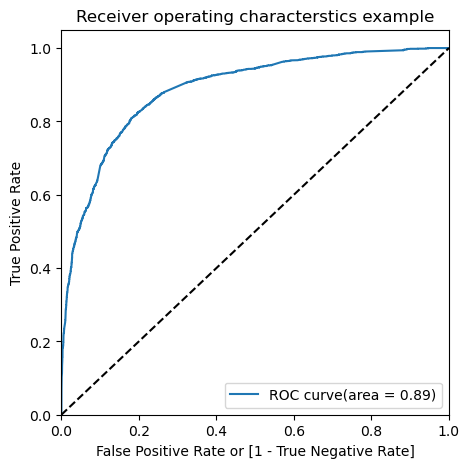

In [138]:
draw_roc(y_train_pred_final.Converted ,y_train_pred_final.Converted_prob)

Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

#### Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [139]:
# Let's create columns with diffrent probabilitity cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x:1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0


In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.591718  0.972200  0.353393
0.2   0.2  0.749488  0.915781  0.645327
0.3   0.3  0.800976  0.851594  0.769270
0.4   0.4  0.816249  0.775961  0.841485
0.5   0.5  0.817981  0.709730  0.885787
0.6   0.6  0.798614  0.602617  0.921383
0.7   0.7  0.786963  0.529027  0.948528
0.8   0.8  0.762557  0.427228  0.972599
0.9   0.9  0.722248  0.298446  0.987708


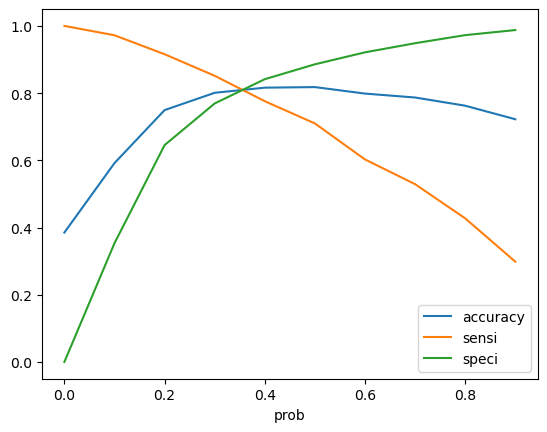

In [141]:
# lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y= ['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0,1


#### Assigning Lead score to the Training data

In [143]:
y_train_pred_final['Lead Score'] =y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0,0,33
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0,1,80


## Model Evaluation

In [144]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3143,  762],
       [ 442, 2004]], dtype=int64)

In [145]:
TP = confusion2[1,1] # true positives
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positive
FN = confusion2[1,0] # false negatives

In [146]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
specificity = TN/(TN + FP)   
PPV = TP /(TP + FP) # positive predictive value
NPV = TN /(TN + FN) # negative predictive value
sensitivity = TP/(TP+FN)
TPR = TP/(TP + FN) # true positive rate
TNR = TN/(TN + FP) # true negative rate
FPR = FP/(TN + FP) # false positive rate
FNR = FN/(TP + FN) # false negative rate
    
print ("True Negatives                        : ", TN)
print ("False Positves                        : ", FP)
print ("False Negatives                       : ", FN)
print ("True Positives                        : ", TP)
    
print ("Model Accuracy value is               : ", round(accuracy*100,2),"%")
print ("Model Sensitivity value is            : ", round(sensitivity*100,2),"%")
print ("Model Specificity value is            : ", round(specificity*100,2),"%")
print ("Model True Positive Rate (TPR)        : ", round(TPR*100,2),"%")
print ("Model False Positive Rate (FPR)       : ", round(FPR*100,2),"%")
print ("Positive Predictive Value             : ", PPV)
print ("Negative Predictive Value             : ", NPV)

True Negatives                        :  3143
False Positves                        :  762
False Negatives                       :  442
True Positives                        :  2004
Model Accuracy value is               :  81.04 %
Model Sensitivity value is            :  81.93 %
Model Specificity value is            :  80.49 %
Model True Positive Rate (TPR)        :  81.93 %
Model False Positive Rate (FPR)       :  19.51 %
Positive Predictive Value             :  0.7245119305856833
Negative Predictive Value             :  0.8767085076708507


In [147]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7956003666361137


In [148]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7097301717089125


using sklearn utilities for the same

In [149]:
from sklearn.metrics import precision_score, recall_score

In [150]:
print('Precision :' , precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision : 0.7956003666361137


In [151]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7097301717089125


#### Precision and recall tradeoff

In [152]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted , y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [153]:
p ,r, thershoulds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

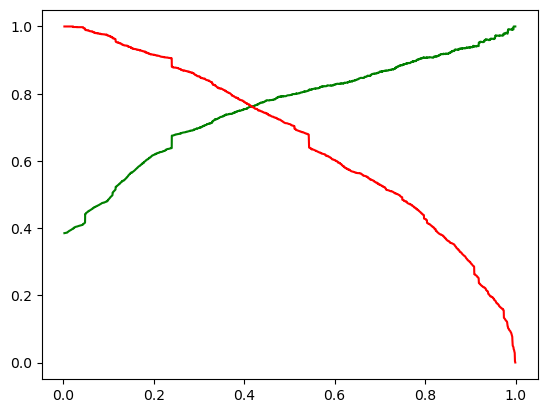

In [154]:
# plotting a trade-off curve between prcision and recall
plt.plot(thershoulds, p[:-1], 'g-')
plt.plot(thershoulds, r[:-1], 'r-')
plt.show()

The above graph shows the trade-off between the Precision and Recall .

#### Making predictions on the test set

Scaling the test data

In [155]:
X_test.columns

Index(['do_not_email', 'do_not_call', 'total_visits', 'time_on_website',
       'page_views_per_visit', 'lead_origin_Landing Page Submission',
       'lead_origin_Lead Add Form', 'lead_origin_Lead Import',
       'lead_source_Facebook', 'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Others',
       'lead_source_Reference', 'lead_source_Referral Sites',
       'lead_source_Welingak Website', 'last_activity_Email Bounced',
       'last_activity_Email Link Clicked', 'last_activity_Email Opened',
       'last_activity_Form Submitted on Website',
       'last_activity_Olark Chat Conversation', 'last_activity_Other_Activity',
       'last_activity_Page Visited on Website', 'last_activity_SMS Sent',
       'last_activity_Unreachable', 'last_activity_Unsubscribed',
       'specialization_Business Administration', 'specialization_E-Business',
       'specialization_E-COMMERCE', 'specialization_Finance Management',
       'specialization_Healthc

In [156]:
X_test[['total_visits', 'time_on_website','page_views_per_visit']] = scaler.transform(X_test[['total_visits', 
                                                                    'time_on_website','page_views_per_visit']])

In [157]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col2]
X_test.head()

,do_not_email,time_on_website,lead_origin_Landing Page Submission,lead_source_Olark Chat,lead_source_Reference,lead_source_Welingak Website,last_activity_Olark Chat Conversation,last_activity_Other_Activity,last_activity_SMS Sent,last_activity_Unsubscribed,specialization_others,occupation_Working Professional,last_notable_activity_Modified,last_notable_activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,1,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0,0


In [158]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

#making predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.126835
1490    0.968324
7936    0.109448
4216    0.803988
3830    0.129754
1800    0.628554
6507    0.343306
4821    0.297353
4223    0.918319
4714    0.329484
dtype: float64

In [159]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
# Let's see the head
y_pred_1.head()

,0
3271,0.126835
1490,0.968324
7936,0.109448
4216,0.803988
3830,0.129754


In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [162]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [163]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [164]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [165]:
y_pred_final.head()

,converted,Prospect ID,0
0,0,3271,0.126835
1,1,1490,0.968324
2,0,7936,0.109448
3,1,4216,0.803988
4,0,3830,0.129754


In [166]:
#Renaming the column
y_pred_final = y_pred_final.rename(columns={0: 'Converted_prob'})

In [167]:
# Let's see the head of y_pred_final
y_pred_final.head()

,converted,Prospect ID,Converted_prob
0,0,3271,0.126835
1,1,1490,0.968324
2,0,7936,0.109448
3,1,4216,0.803988
4,0,3830,0.129754


In [168]:
y_pred_final = y_pred_final[['Prospect ID','converted','Converted_prob']]

In [169]:
y_pred_final.head()

,Prospect ID,converted,Converted_prob
0,3271,0,0.126835
1,1490,1,0.968324
2,7936,0,0.109448
3,4216,1,0.803988
4,3830,0,0.129754


In [170]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [171]:
y_pred_final.head()

,Prospect ID,converted,Converted_prob,final_predicted
0,3271,0,0.126835,0
1,1490,1,0.968324,1
2,7936,0,0.109448,0
3,4216,1,0.803988,1
4,3830,0,0.129754,0


In [172]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted))

Accuracy : 0.8046272493573264


In [173]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )
confusion2

array([[1395,  339],
       [ 193,  796]], dtype=int64)

In [174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8048533872598584


In [176]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8044982698961938


#### Assigning Lead Score to the Testing data

In [177]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.126835,0,13
1,1490,1,0.968324,1,97
2,7936,0,0.109448,0,11
3,4216,1,0.803988,1,80
4,3830,0,0.129754,0,13


#### Observations:
After running the model on the Test Data , we obtain:

- Accuracy : 80.4 %
- Sensitivity : 80.4 %
- Specificity : 80.4 %

### Results :
1) Comparing the values obtained for Train & Test:
####  Train Data:
 - Accuracy : 81.0 %
 - Sensitivity : 81.9 %
 - Specificity : 80.5 %
#### Test Data:
 - Accuracy : 80.4 %
 - Sensitivity : 80.4 %
 - Specificity : 80.4 %

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

#### 2) Finding out the leads which should be contacted:

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [178]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.968324,1,97
8,4223,1,0.918319,1,92
16,1946,1,0.924928,1,92
21,2461,1,0.992885,1,99
23,5822,1,0.998023,1,100
...,...,...,...,...,...
2694,1566,1,0.946456,1,95
2699,6461,1,0.961588,1,96
2703,5741,1,0.909023,1,91
2715,6299,1,0.872498,1,87


#### So there are 369 leads which can be contacted and have a high chance of getting converted.The Prospect ID of the customers to be contacted are :

In [179]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947, 4807,
        446,  789, 8372, 5805, 3758, 1561, 5367,  737, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490,
       1995, 4498, 5797, 8687,  831, 7653, 2018, 6743, 3976, 5769, 1051,
       1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481,  785,
       3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 7417, 4179, 8568,
       7268, 6784, 6754, 7236, 2960, 7753, 3983,  802, 8745, 4717,  505,
       8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 7175, 1675,
       6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793, 4837, 2495,
        822, 8111, 2378, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489,
       2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,  174,
       2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708, 1304, 6066, 6538,
       5700, 1388, 5815, 7970, 7902, 5804, 7805, 50

#### 3) Finding out the Important Features from our final model:

In [180]:
result.params.sort_values(ascending=False)

lead_source_Welingak Website             5.858769
lead_source_Reference                    3.340121
occupation_Working Professional          2.606375
last_activity_Other_Activity             2.198777
last_notable_activity_Unreachable        1.546980
last_activity_Unsubscribed               1.378366
last_activity_SMS Sent                   1.325023
time_on_website                          1.097643
lead_source_Olark Chat                   1.091475
const                                   -0.071692
last_notable_activity_Modified          -0.881599
last_activity_Olark Chat Conversation   -0.948539
lead_origin_Landing Page Submission     -1.186301
specialization_others                   -1.198306
do_not_email                            -1.678278
dtype: float64

### Recommendations:
- The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
- The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
- The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
- The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
- The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
- The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
- The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
- The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
- The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.